# use case:- Applying KMeans Clustering Algorithm to obtain clusters based on ratings and price of products and observing trends among the clusters

In [3]:
### importing neccesary libraries which is required for our analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_patio=pd.read_csv('PATIO_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING')       # read data

In [6]:
df_patio.head()              # display top 5 columns

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE
0,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,AUVPE2KEXBJVT,5.0,True,I don't spend a lot on my flags because they r...,2011-12-11
1,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A2F6GES1MBOFXS,5.0,True,"Super fast processing and shipping, if you are...",2011-07-30
2,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1SDVD3SZI1BAK,5.0,True,Great product. I would recommend this product...,2016-05-04
3,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1ZQJ3KCSLUPR3,5.0,True,GREAT PRICE I LOVE MY STATE AND COUNTRY,2015-11-02
4,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,ANU8FBZM618M3,5.0,True,Great display flag for the den.,2015-09-01


In [7]:
df_patio.shape                  # checking the shape of data.

(932665, 10)

In [8]:
df_patio.drop_duplicates(subset=None,keep='first',inplace=True)                 # drop duplicate rows instead of first entry 

In [9]:
df_patio.shape

(727480, 10)

In [10]:
df_patio.info()                    #checking info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727480 entries, 0 to 932664
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   title        727480 non-null  object 
 1   brand        727480 non-null  object 
 2   main_cat     727480 non-null  object 
 3   price        727480 non-null  float64
 4   product_id   727480 non-null  object 
 5   Reviewer_id  727480 non-null  object 
 6   rating       727480 non-null  float64
 7   verified     727480 non-null  bool   
 8   reviewText   727480 non-null  object 
 9   DATE         727480 non-null  object 
dtypes: bool(1), float64(2), object(7)
memory usage: 56.2+ MB


In [11]:
df_patio.describe()            # to check the statistics of data

,price,rating
count,727480.000000,727480.000000
mean,32.476873,4.326439
std,59.405987,1.170469
min,0.010000,1.000000
25%,9.690000,4.000000
50%,18.900000,5.000000
75%,52.730167,5.000000
max,4724.000000,5.000000


In [12]:
df_patio.isnull().sum()               # checking null values in our data


title          0
brand          0
main_cat       0
price          0
product_id     0
Reviewer_id    0
rating         0
verified       0
reviewText     0
DATE           0
dtype: int64

In [13]:
df_patio['rating']=df_patio['rating'].astype('int64')         #change the datatype of rating float to int64

### Using KMeans Algorithm

In [14]:
df_pivot=df_patio.pivot_table(index=['title'],values=['rating','price'],aggfunc='mean')
df_pivot

,price,rating
title,,
"1 X Grill Gripper for Ceramic Kamado Grill Such As Big Green Egg, Primo, Grill Dome Etc.",52.730167,4.458333
"139573 Replacement belt made to FSP specs. For Craftsman, Poulan, Husqvarna, Wizard, more.",18.870000,4.333333
"3, 6, 9, and 12 Volt Solar Panel with 9 Volt and AA Battery Charger",52.730167,3.400000
496914/793281 Briggs and Stratton OEM Coil,19.490000,4.750000
"4D Concepts 3-Piece Slate Square Plant Stands with Slate Tops, Metal/Slate",52.730167,4.333333
...,...,...
yueton 20pcs Garden Yard Planter Colorful Whimsical Dragonfly Lawn Stakes Garden Ornaments &amp; Patio Decoration,8.990000,4.428571
yueton Solar Controller 10a 12v/24v Solar Charge Controller Solar Panel Battery Regulator Safe Protection,9.990000,4.300000
"zero-G 4001-50 Lightweight, Ultra Flexible, Durable, Kink-Free Garden Hose, 5/8-Inch by 50-Feet",36.980000,4.000000


In [15]:
df_prod_avg=pd.DataFrame()
df_prod_avg['title']=list(df_pivot.index)
df_prod_avg['Avg_Price']=df_pivot[['price']].values
df_prod_avg['Average Rating']=df_pivot[['rating']].values

In [16]:
df_prod_avg

,title,Avg_Price,Average Rating
0,1 X Grill Gripper for Ceramic Kamado Grill Su...,52.730167,4.458333
1,139573 Replacement belt made to FSP specs. Fo...,18.870000,4.333333
2,"3, 6, 9, and 12 Volt Solar Panel with 9 Volt ...",52.730167,3.400000
3,496914/793281 Briggs and Stratton OEM Coil,19.490000,4.750000
4,4D Concepts 3-Piece Slate Square Plant Stands...,52.730167,4.333333
...,...,...,...
31271,yueton 20pcs Garden Yard Planter Colorful Whim...,8.990000,4.428571
31272,yueton Solar Controller 10a 12v/24v Solar Char...,9.990000,4.300000
31273,"zero-G 4001-50 Lightweight, Ultra Flexible, Du...",36.980000,4.000000
31274,~ Tibetan Large 12 X 12 Inches Prayer Flags ~ ...,52.730167,4.571429


In [17]:
patio_df_cluster=pd.merge(df_patio,df_prod_avg,on=('title'),how='inner')

In [18]:
patio_df_cluster.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE,Avg_Price,Average Rating
0,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,AUVPE2KEXBJVT,5,True,I don't spend a lot on my flags because they r...,2011-12-11,52.730167,4.888889
1,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A2F6GES1MBOFXS,5,True,"Super fast processing and shipping, if you are...",2011-07-30,52.730167,4.888889
2,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1SDVD3SZI1BAK,5,True,Great product. I would recommend this product...,2016-05-04,52.730167,4.888889
3,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1ZQJ3KCSLUPR3,5,True,GREAT PRICE I LOVE MY STATE AND COUNTRY,2015-11-02,52.730167,4.888889
4,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,ANU8FBZM618M3,5,True,Great display flag for the den.,2015-09-01,52.730167,4.888889


###### We shall consider the price column and the rating column for clustering

In [19]:
df_patio_cluster=patio_df_cluster[['Avg_Price','Average Rating']]

In [20]:
df_patio_cluster.head()

,Avg_Price,Average Rating
0,52.730167,4.888889
1,52.730167,4.888889
2,52.730167,4.888889
3,52.730167,4.888889
4,52.730167,4.888889


###### Performing Min-Max Scaling

In [21]:
scaler=MinMaxScaler()

In [22]:
df_patio_cluster_scaled=pd.DataFrame(scaler.fit_transform(df_patio_cluster.to_numpy()),columns=df_patio_cluster.columns)

In [23]:
df_patio_cluster_scaled.head()

,Avg_Price,Average Rating
0,0.01116,0.972222
1,0.01116,0.972222
2,0.01116,0.972222
3,0.01116,0.972222
4,0.01116,0.972222


###### Findng the optimal number of clusters

#### 1) Elbow method

In [24]:
X=df_patio_cluster_scaled.copy()

In [25]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,random_state=10)
    km.fit(X)
    sse.append(km.inertia_)

In [26]:
sse

[9940.244461883663,
 3905.593895716306,
 2077.017311784424,
 1289.1512874961707,
 900.2244113687789,
 683.9309686757448,
 541.6004450076247,
 447.15788050914404,
 377.882744165899]

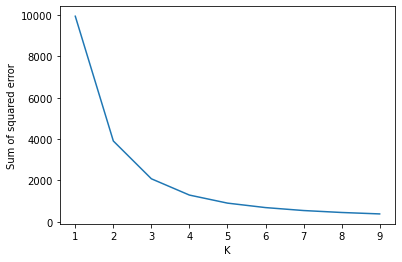

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

###### We see from the elbow curve method that the ideal number of clusters is 4

In [28]:
# Predicting KMeans cluster distribution

In [29]:
km = KMeans(n_clusters=4,random_state=10)
yp = km.fit_predict(X)
yp

array([2, 2, 2, ..., 2, 2, 2])

In [30]:
df_patio_cluster_scaled['cluster'] = yp
df_patio_cluster_scaled.head()

,Avg_Price,Average Rating,cluster
0,0.01116,0.972222,2
1,0.01116,0.972222,2
2,0.01116,0.972222,2
3,0.01116,0.972222,2
4,0.01116,0.972222,2


###### Finding Cluster Centroids

In [31]:
cluster_centroid = km.cluster_centers_
cluster_centroid

array([[0.00716616, 0.69970784],
       [0.00568842, 0.47387042],
       [0.00682431, 0.92773113],
       [0.00692381, 0.83036454]])

###### Segregating the Clusters

In [32]:
df1_cluster = df_patio_cluster_scaled[df_patio_cluster_scaled.cluster==0]
df2_cluster = df_patio_cluster_scaled[df_patio_cluster_scaled.cluster==1]
df3_cluster = df_patio_cluster_scaled[df_patio_cluster_scaled.cluster==2]
df4_cluster = df_patio_cluster_scaled[df_patio_cluster_scaled.cluster==3]

###### Observing the Clusters

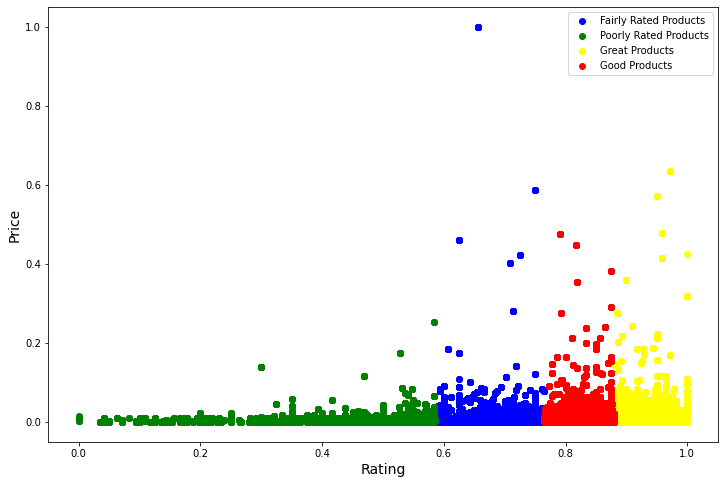

In [33]:
plt.figure(figsize=(12,8))
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(df1_cluster['Average Rating'],df1_cluster['Avg_Price'],color='blue')
plt.scatter(df2_cluster['Average Rating'],df2_cluster['Avg_Price'],color='green')
plt.scatter(df3_cluster['Average Rating'],df3_cluster['Avg_Price'],color='yellow')
plt.scatter(df4_cluster['Average Rating'],df4_cluster['Avg_Price'],color='red')
plt.legend(['Fairly Rated Products','Poorly Rated Products','Great Products','Good Products'])
plt.show()

In [34]:
df_patio_copy=df_patio.copy()

In [35]:
df_patio_copy['Kmeans Clusters']=yp

###### Viewing Pairplot 

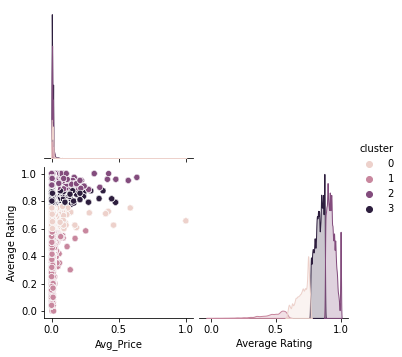

In [36]:
sb.set_palette("bright")
sb.pairplot(df_patio_cluster_scaled, kind="scatter", hue ="cluster", corner=True)
plt.show()

In [37]:
# Performing Agglomerative Hierrarchial Clustering

In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [39]:
'''
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=12.5, color='r', linestyle='--')  # cutting line of the dendogram
ax = plt.gca()  # used to create current polar axis on current figure
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()
'''

"\nplt.figure(figsize=(30, 10))\ndendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))\nplt.axhline(y=12.5, color='r', linestyle='--')  # cutting line of the dendogram\nax = plt.gca()  # used to create current polar axis on current figure\nax.tick_params(axis='x', which='major', labelsize=10)\nplt.title('Customer Dendrogram',fontsize=30)\nplt.xlabel('Customers',fontsize=20)\nplt.ylabel('Euclidean distance', fontsize=20)\nplt.show()\n"

###### We see that KMeans Clustering gives us the best clustering so now we must perform EDA to observe trends in the clusters

In [40]:
df_patio['Cluster']=yp

In [41]:
df_patio.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE,Cluster
0,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,AUVPE2KEXBJVT,5,True,I don't spend a lot on my flags because they r...,2011-12-11,2
1,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A2F6GES1MBOFXS,5,True,"Super fast processing and shipping, if you are...",2011-07-30,2
2,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1SDVD3SZI1BAK,5,True,Great product. I would recommend this product...,2016-05-04,2
3,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1ZQJ3KCSLUPR3,5,True,GREAT PRICE I LOVE MY STATE AND COUNTRY,2015-11-02,2
4,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,ANU8FBZM618M3,5,True,Great display flag for the den.,2015-09-01,2


In [42]:
df_fairly_rated_cluster = df_patio[df_patio['Cluster']==0]
df_poorly_rated_cluster = df_patio[df_patio['Cluster']==1]
df_best_rated_cluster = df_patio[df_patio['Cluster']==2]
df_well_rated_cluster = df_patio[df_patio['Cluster']==3]

In [43]:
df_cluster_compare=pd.DataFrame()
df_cluster_compare['Product Clusters']=['Poorly Rated Products','Fairly Rated Products','Well Rated Products','Best Rated Products']
df_cluster_compare['Average Price']=[df_poorly_rated_cluster['price'].mean(),df_fairly_rated_cluster['price'].mean(),df_well_rated_cluster['price'].mean(),df_best_rated_cluster['price'].mean()]

###### Viewing Average Price among poorly, fairly, well and best rated products

In [44]:
df_cluster_compare

,Product Clusters,Average Price
0,Poorly Rated Products,29.596975
1,Fairly Rated Products,33.010653
2,Well Rated Products,32.335645
3,Best Rated Products,32.709489


###### Performing EDA to identify trends among best rated products

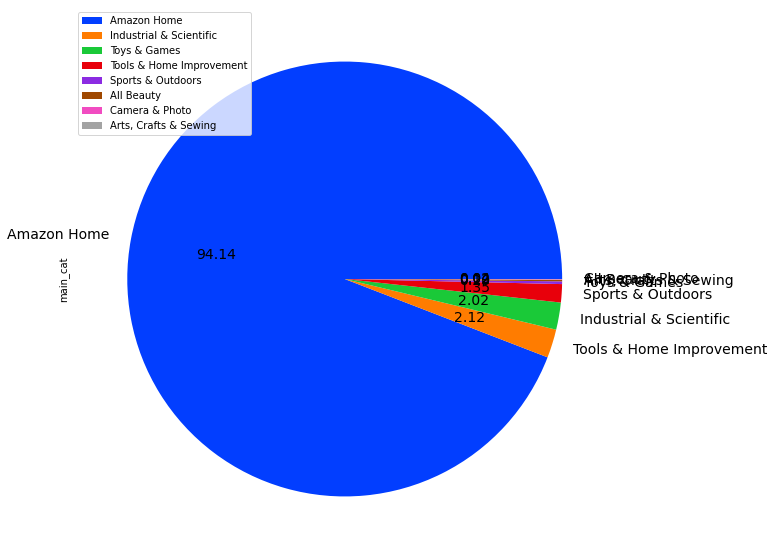

In [45]:
plt.figure(figsize=(16,10))
df_best_rated_cluster['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_best_rated_cluster['main_cat'].unique(),loc='upper left');

###### Since we see that Tools and Home Improvement, Amazon Home, Industrial & Scientific and Automotive comprise more than 99.5%, we observe only those categories

In [46]:
cat=['Tools & Home Improvement','Amazon Home','Industrial & Scientific','Sports & Outdoors']

In [47]:
df_patio_th_ah_is_a_best=df_best_rated_cluster[df_best_rated_cluster['main_cat'].isin(cat)]

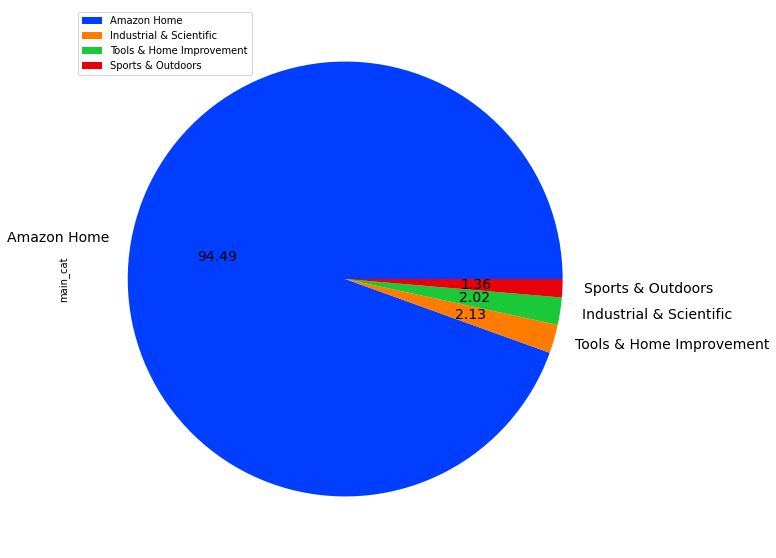

In [48]:
plt.figure(figsize=(16,10))
df_patio_th_ah_is_a_best['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_patio_th_ah_is_a_best['main_cat'].unique(),loc='upper left');

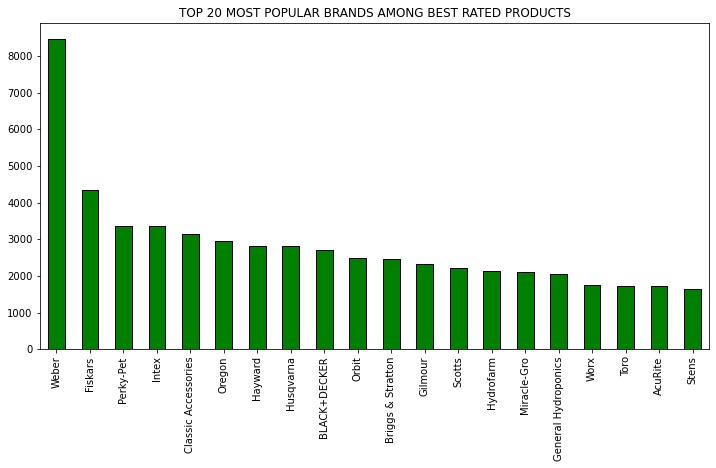

In [49]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG BEST RATED PRODUCTS")
df_best_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

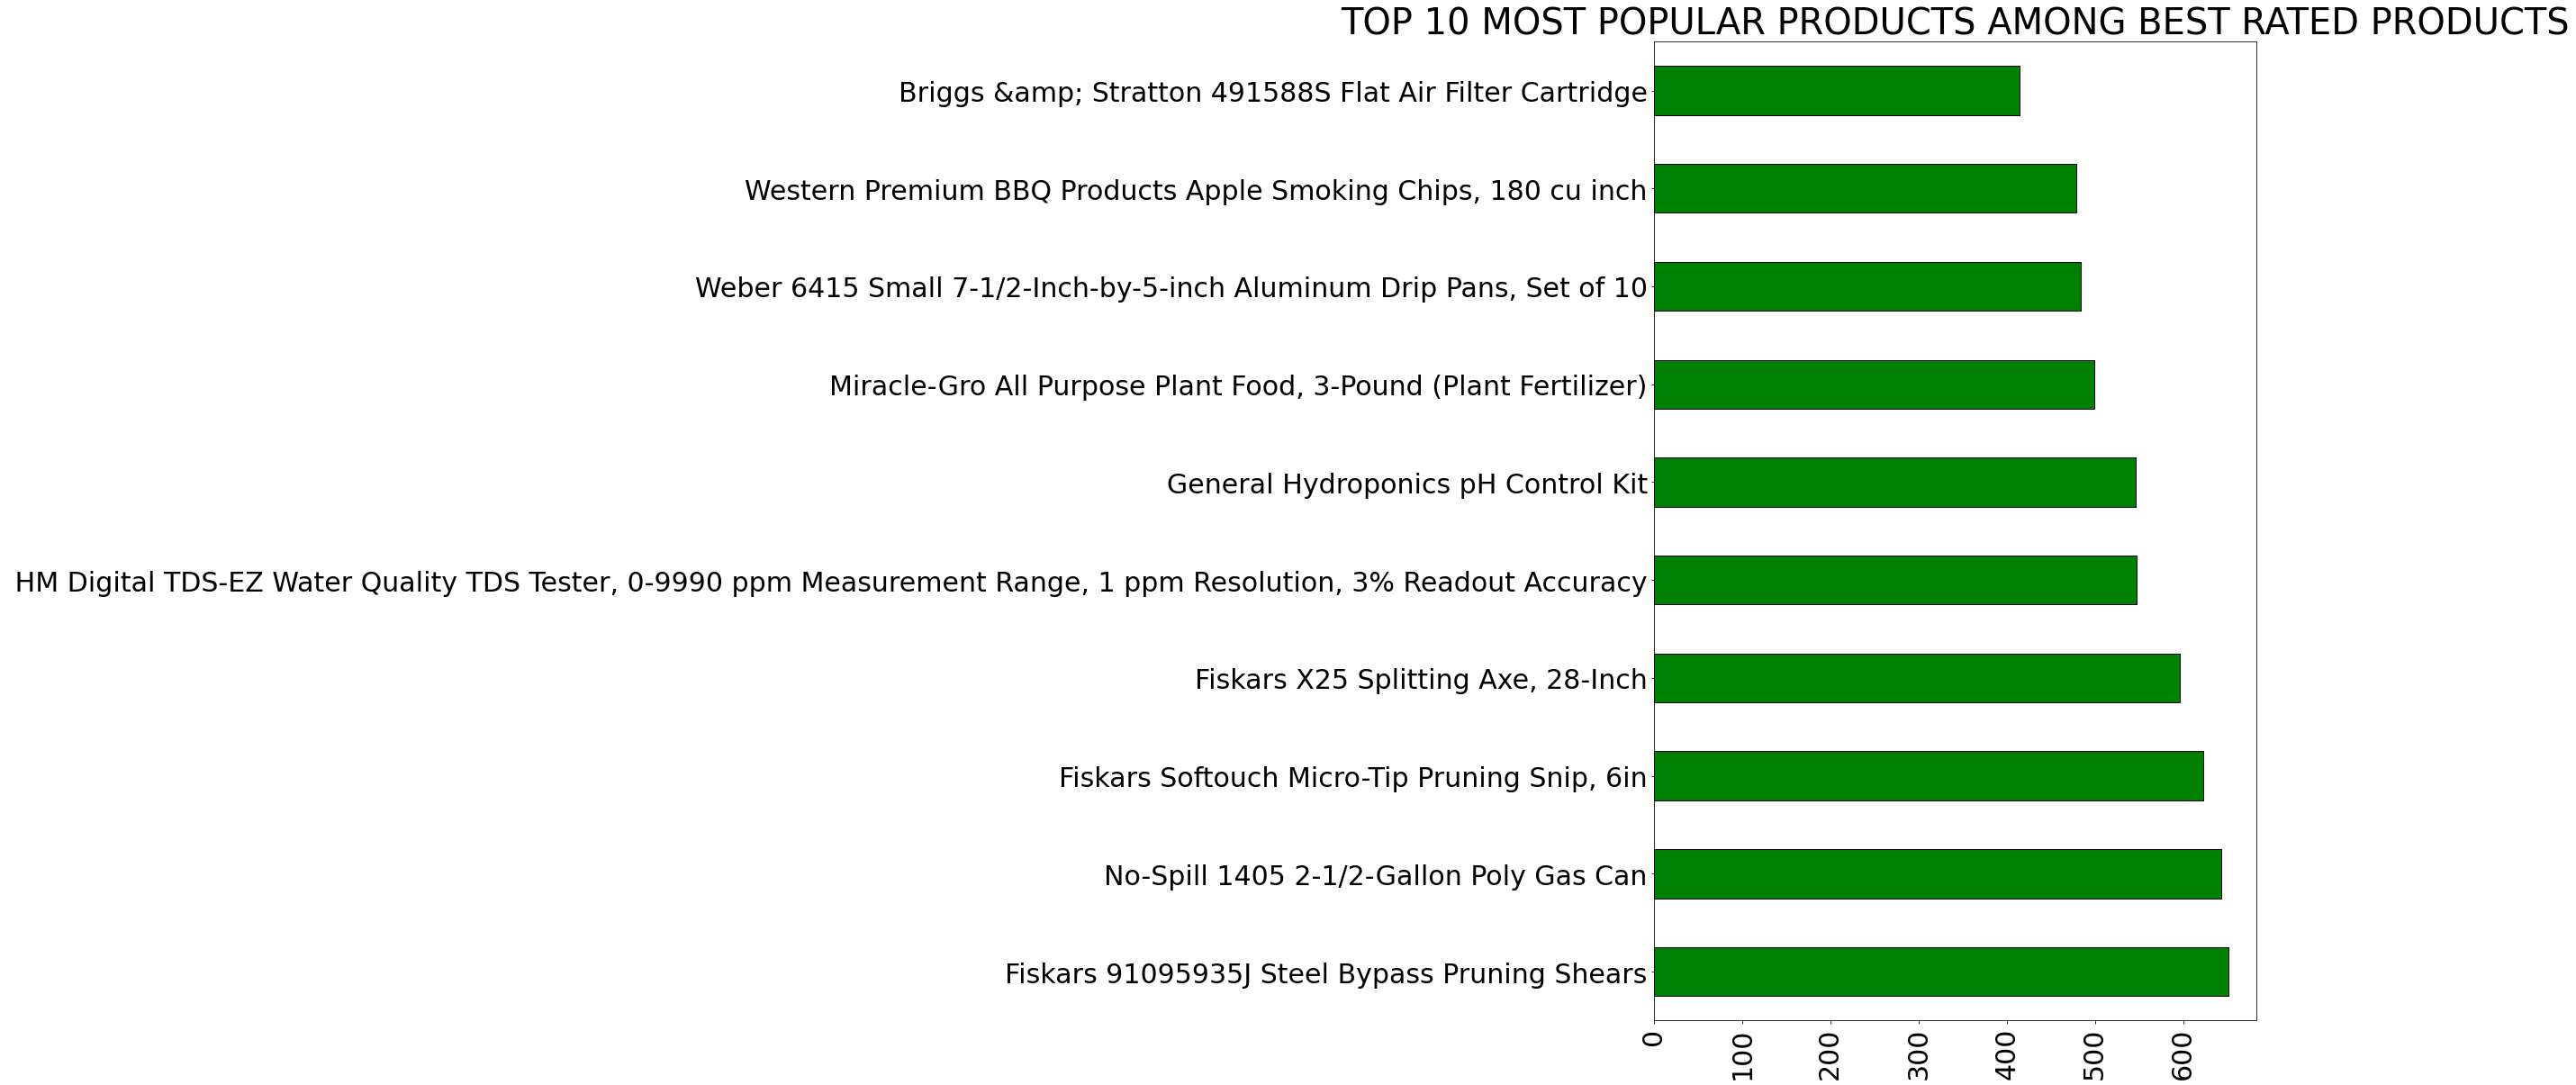

In [50]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG BEST RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_best_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

In [51]:
df_best_rated_cluster.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE,Cluster
0,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,AUVPE2KEXBJVT,5,True,I don't spend a lot on my flags because they r...,2011-12-11,2
1,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A2F6GES1MBOFXS,5,True,"Super fast processing and shipping, if you are...",2011-07-30,2
2,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1SDVD3SZI1BAK,5,True,Great product. I would recommend this product...,2016-05-04,2
3,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,A1ZQJ3KCSLUPR3,5,True,GREAT PRICE I LOVE MY STATE AND COUNTRY,2015-11-02,2
4,Colorado US State Flag: 3x5foot poly,3x5fFlags,Amazon Home,52.730167,9539723809,ANU8FBZM618M3,5,True,Great display flag for the den.,2015-09-01,2


<AxesSubplot:xlabel='verified', ylabel='count'>

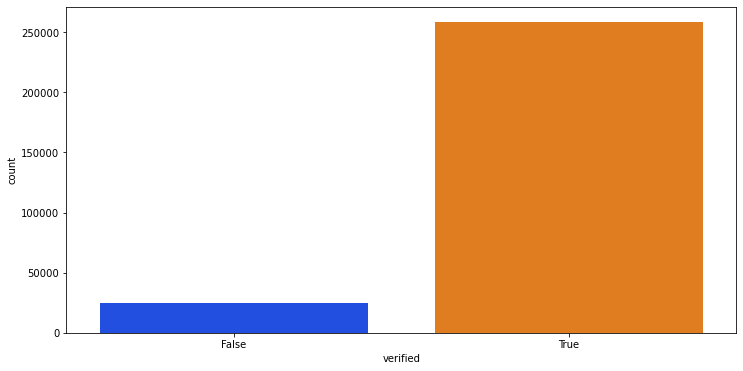

In [52]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_best_rated_cluster,x='verified')

###### Performing EDA to identify characteristics among well rated products

In [53]:
df_patio_th_ah_is_a_well=df_well_rated_cluster[df_well_rated_cluster['main_cat'].isin(cat)]

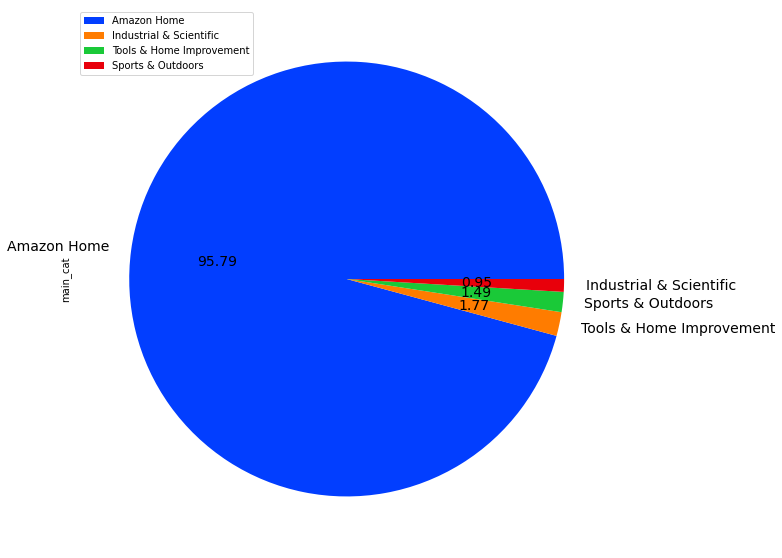

In [54]:
plt.figure(figsize=(16,10))
df_patio_th_ah_is_a_well['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_patio_th_ah_is_a_well['main_cat'].unique(),loc='upper left');

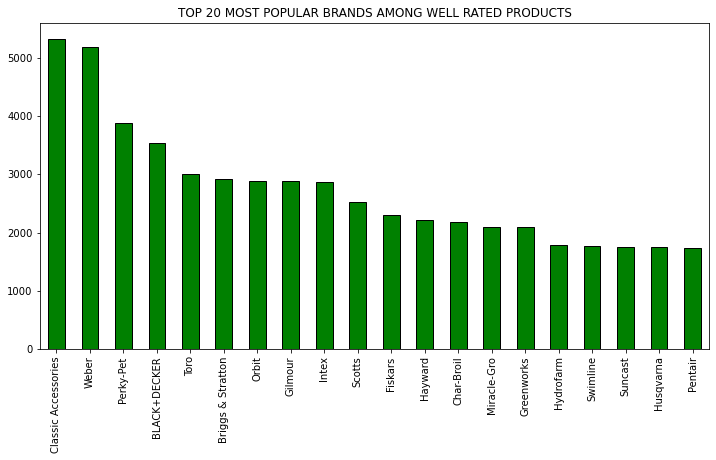

In [55]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG WELL RATED PRODUCTS")
df_well_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

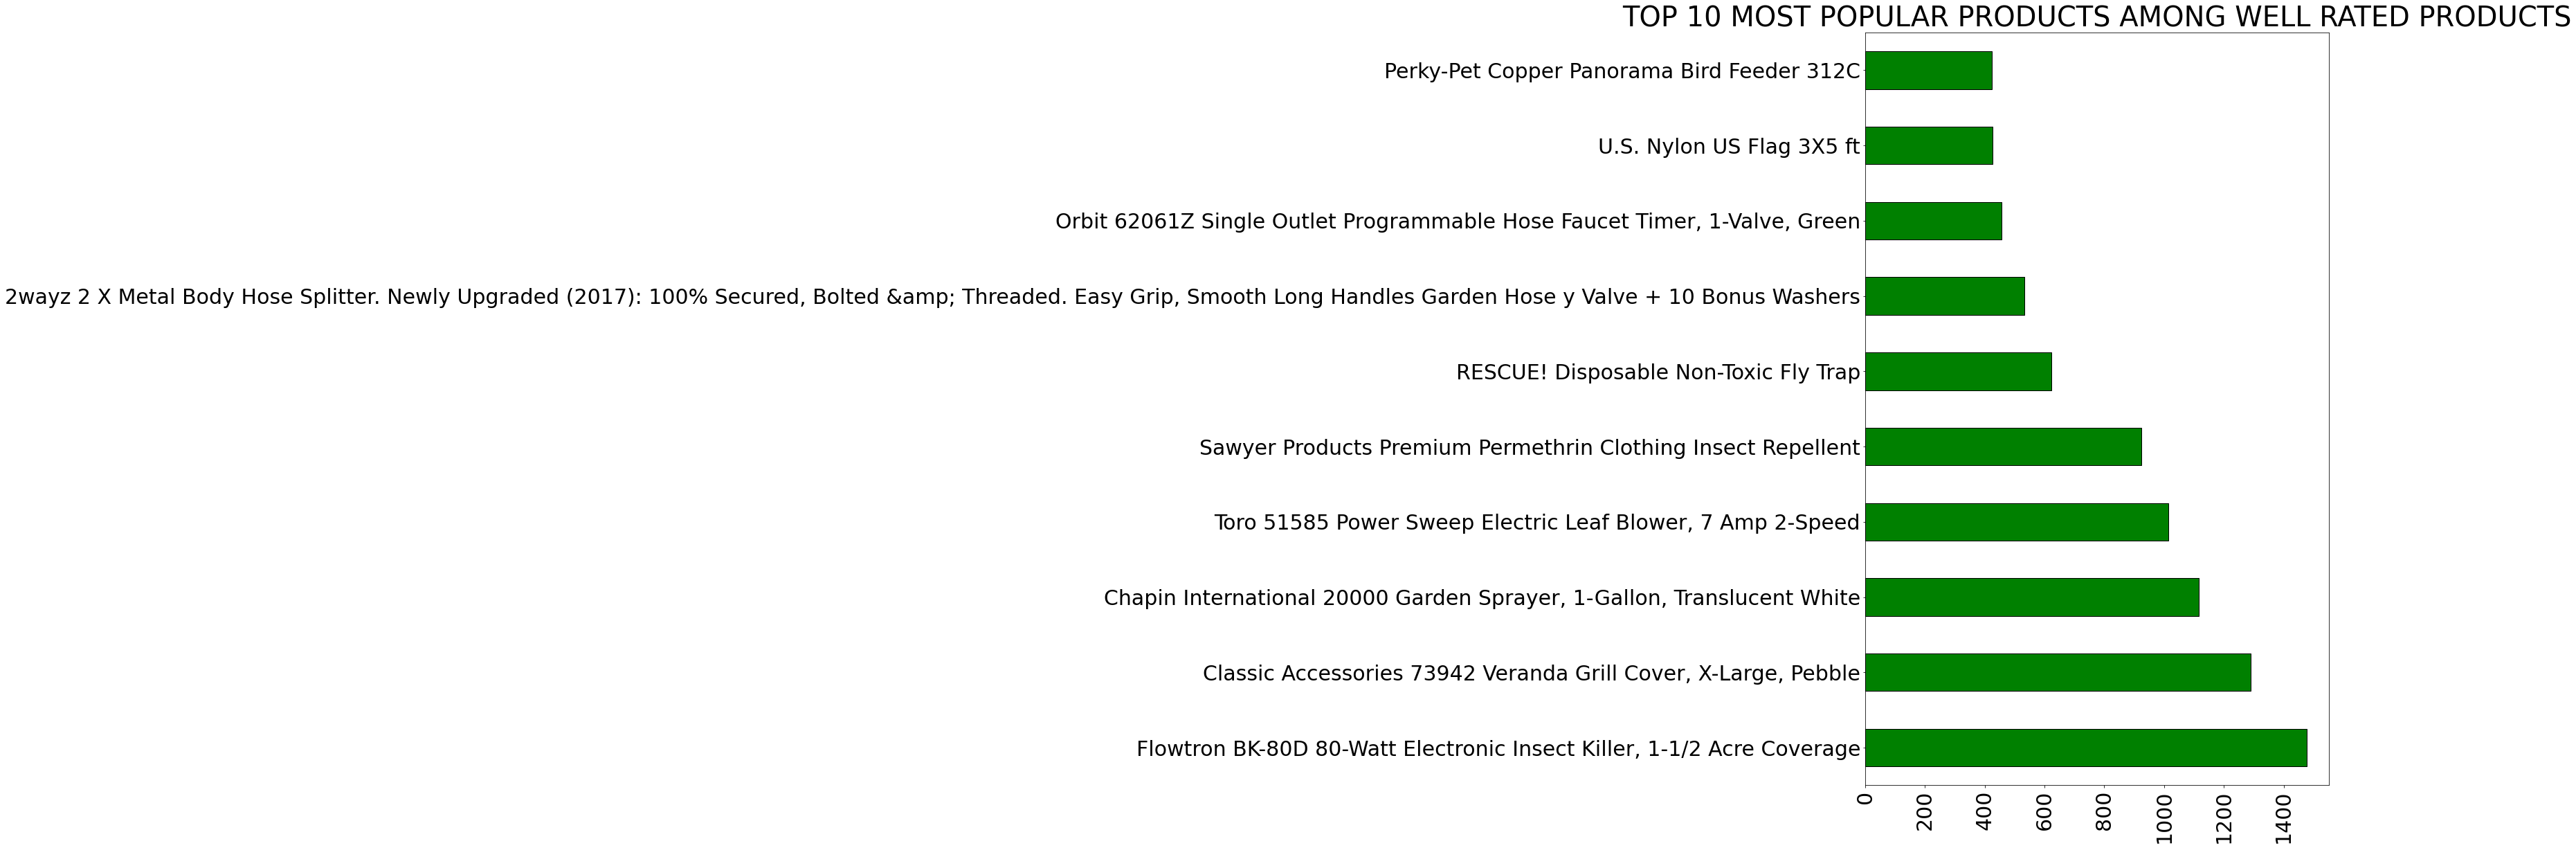

In [56]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG WELL RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_well_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

<AxesSubplot:xlabel='verified', ylabel='count'>

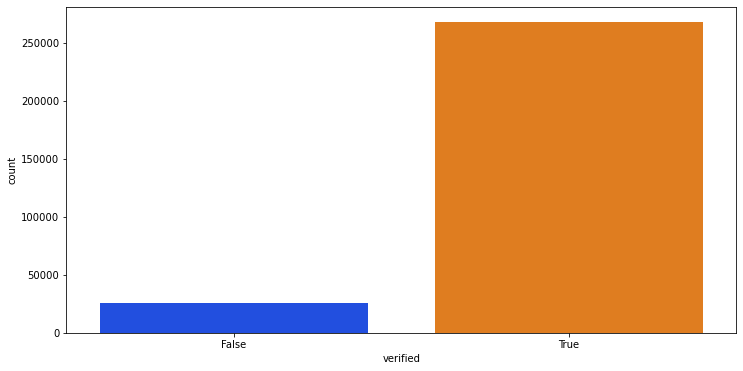

In [57]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_well_rated_cluster,x='verified')

###### Performing EDA to identify trends among fairly rated products

In [58]:
df_patio_th_ah_is_a_fairly=df_fairly_rated_cluster[df_fairly_rated_cluster['main_cat'].isin(cat)]

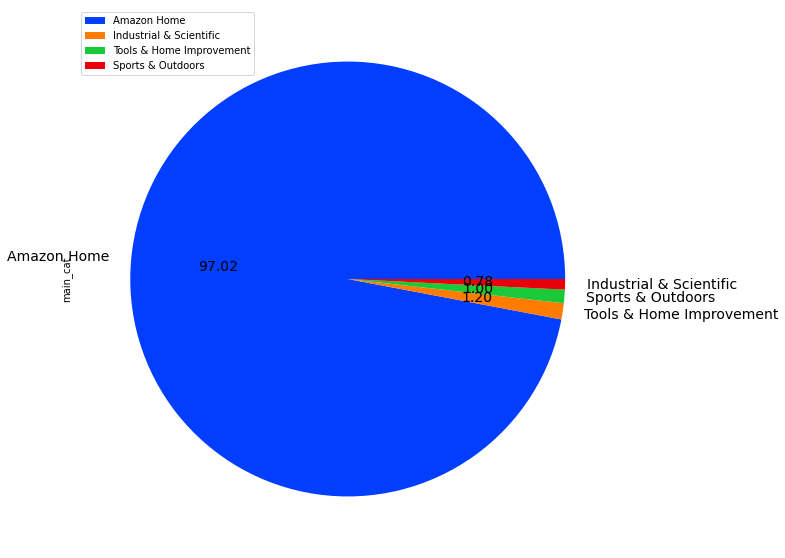

In [59]:
plt.figure(figsize=(16,10))
df_patio_th_ah_is_a_fairly['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_patio_th_ah_is_a_fairly['main_cat'].unique(),loc='upper left');

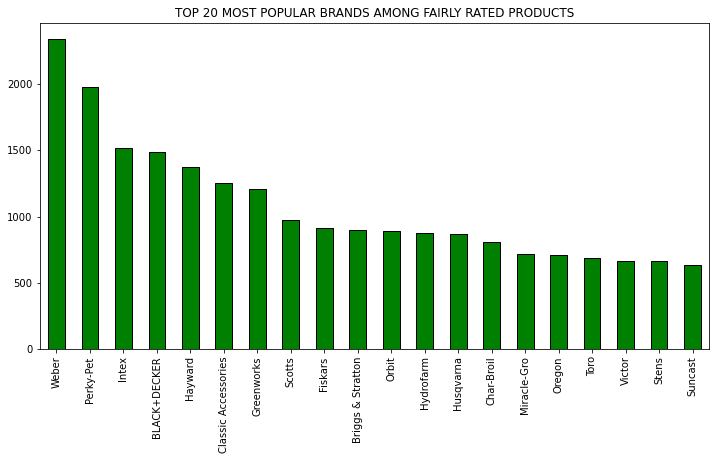

In [60]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG FAIRLY RATED PRODUCTS")
df_fairly_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

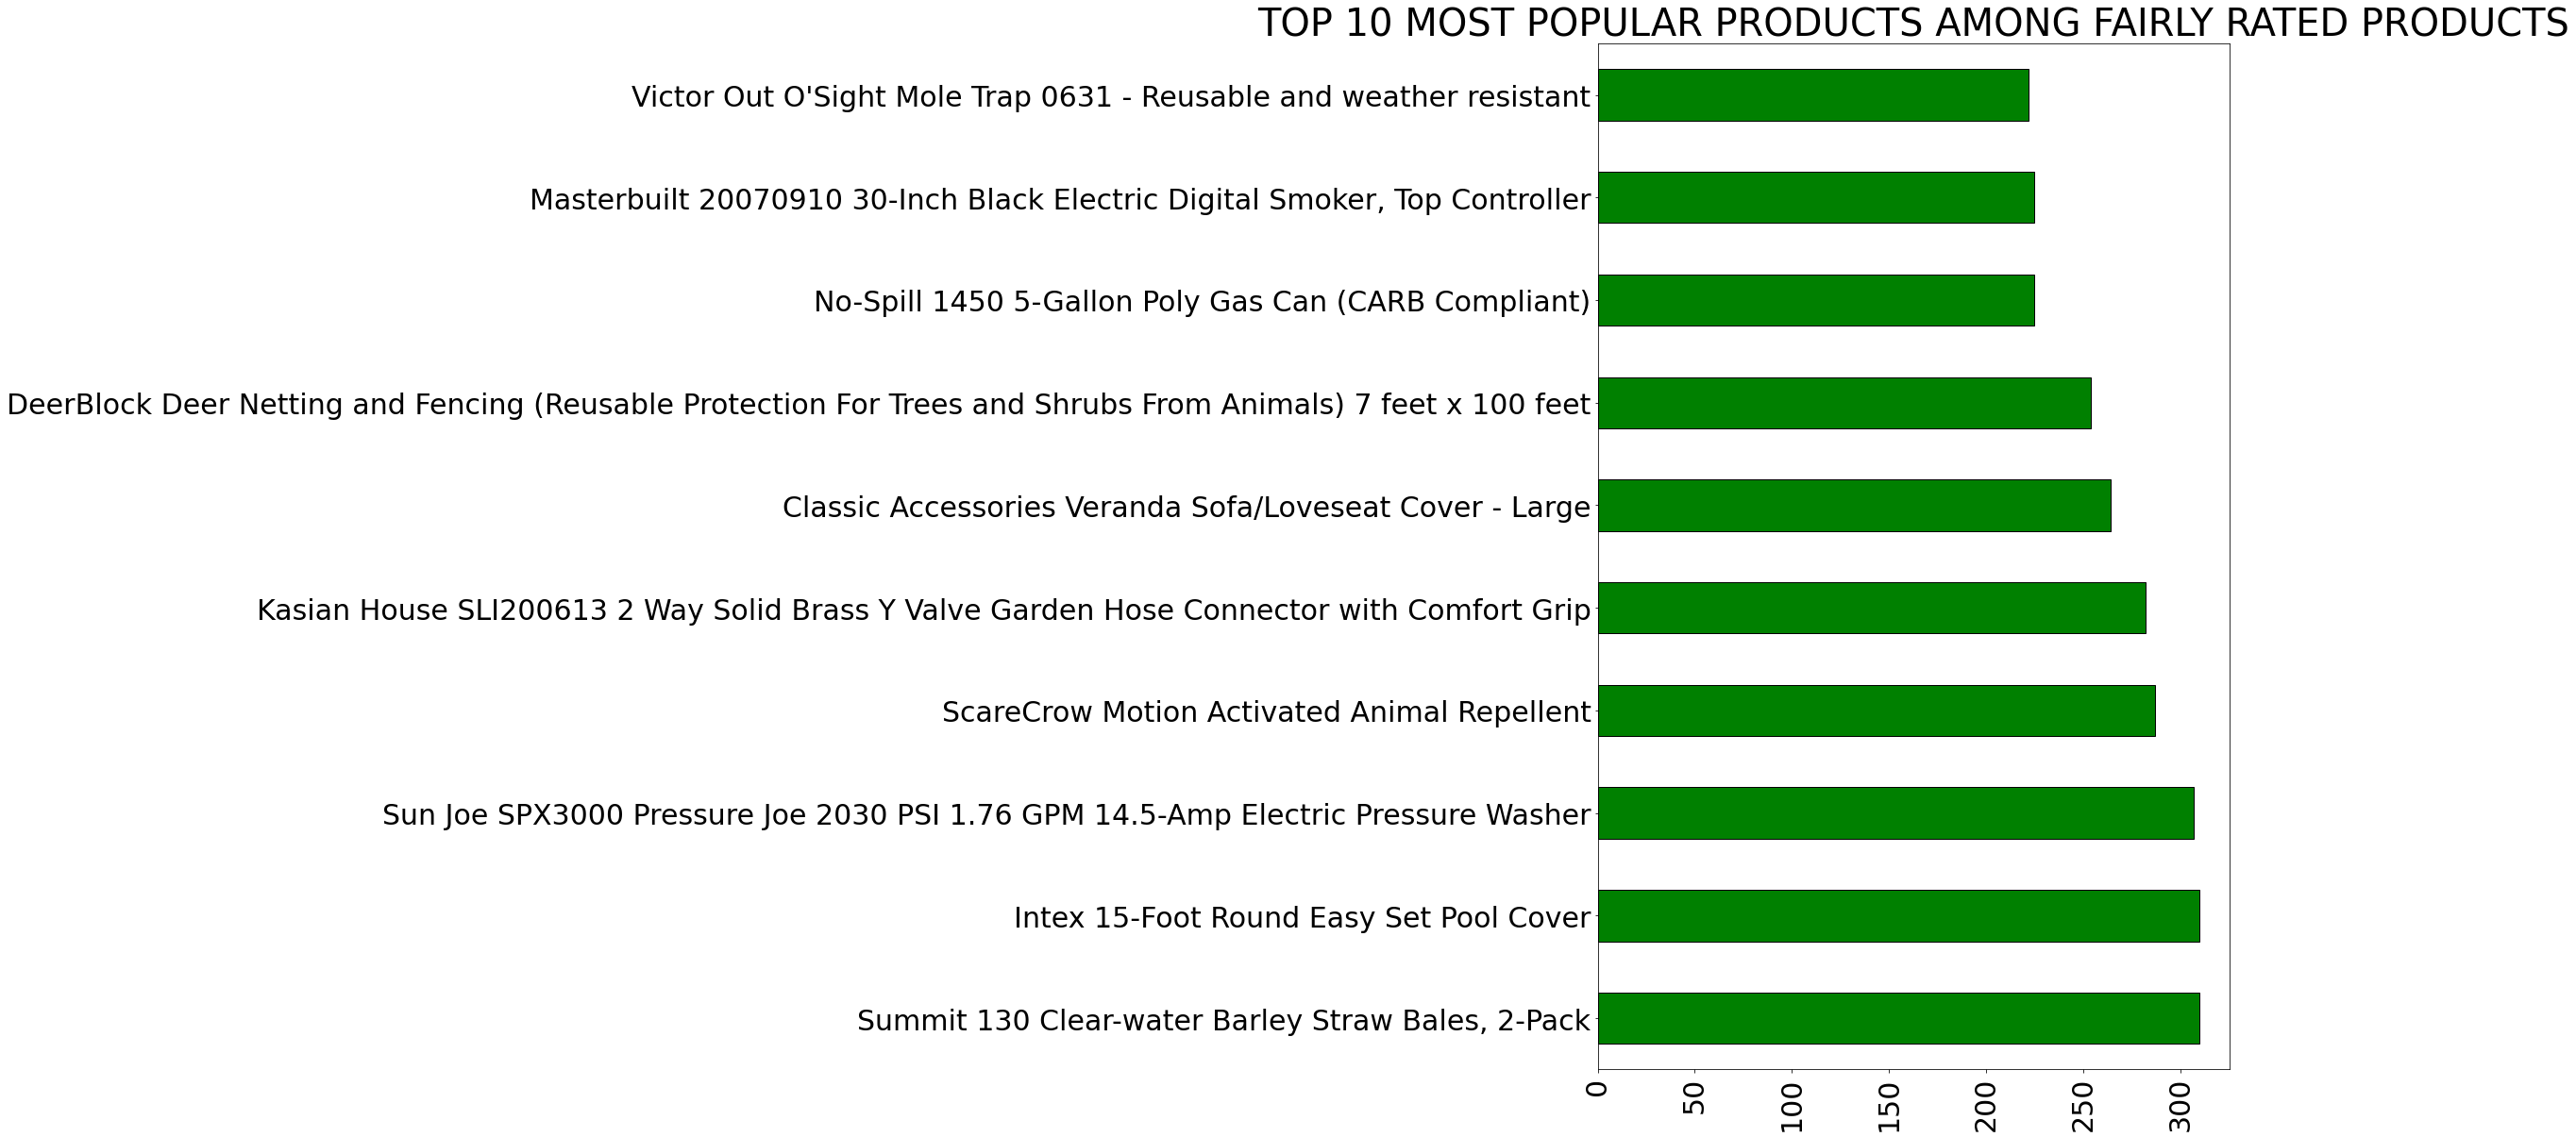

In [61]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG FAIRLY RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_fairly_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

<AxesSubplot:xlabel='verified', ylabel='count'>

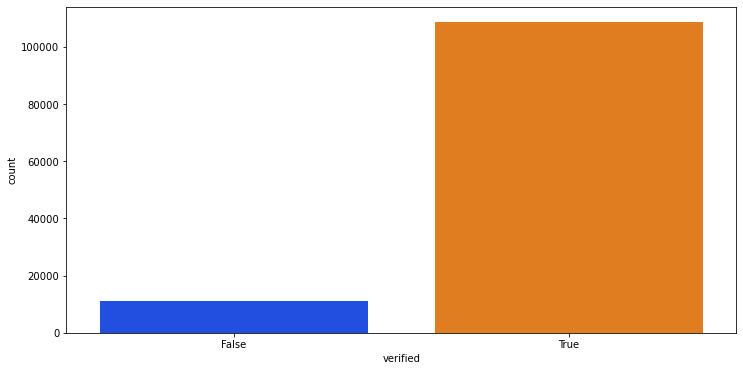

In [62]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_fairly_rated_cluster,x='verified')

###### Performing EDA to identify trends among poorly rated products

In [63]:
df_patio_th_ah_is_a_poorly=df_poorly_rated_cluster[df_poorly_rated_cluster['main_cat'].isin(cat)]

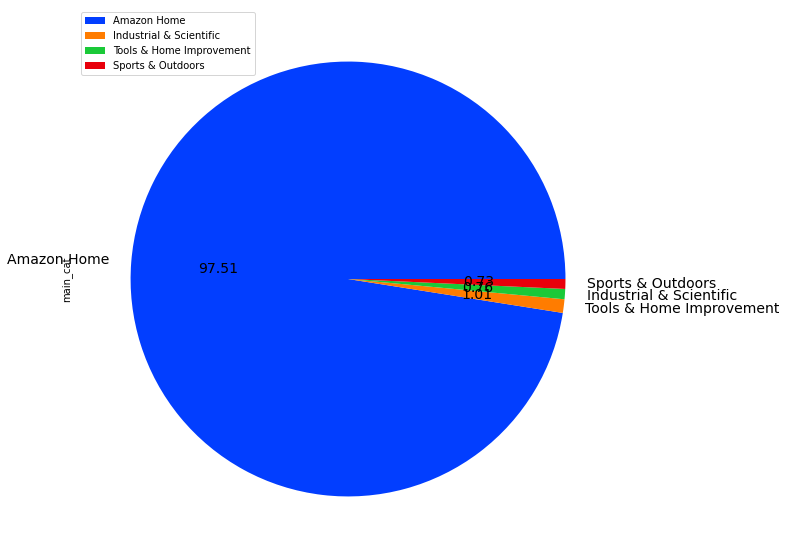

In [64]:
plt.figure(figsize=(16,10))
df_patio_th_ah_is_a_poorly['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_patio_th_ah_is_a_poorly['main_cat'].unique(),loc='upper left');

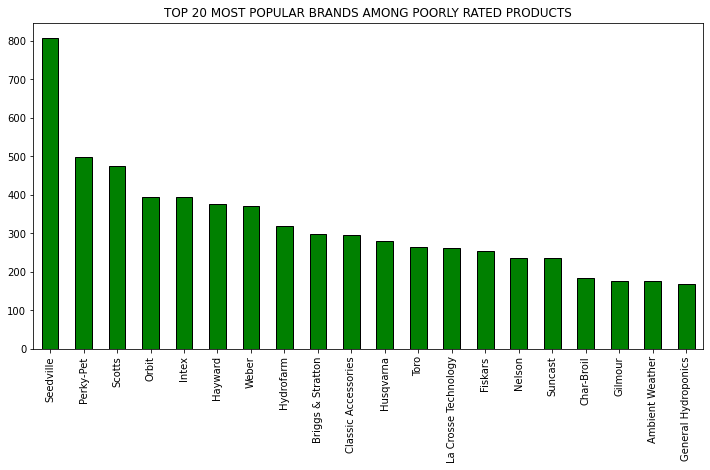

In [65]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG POORLY RATED PRODUCTS")
df_poorly_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

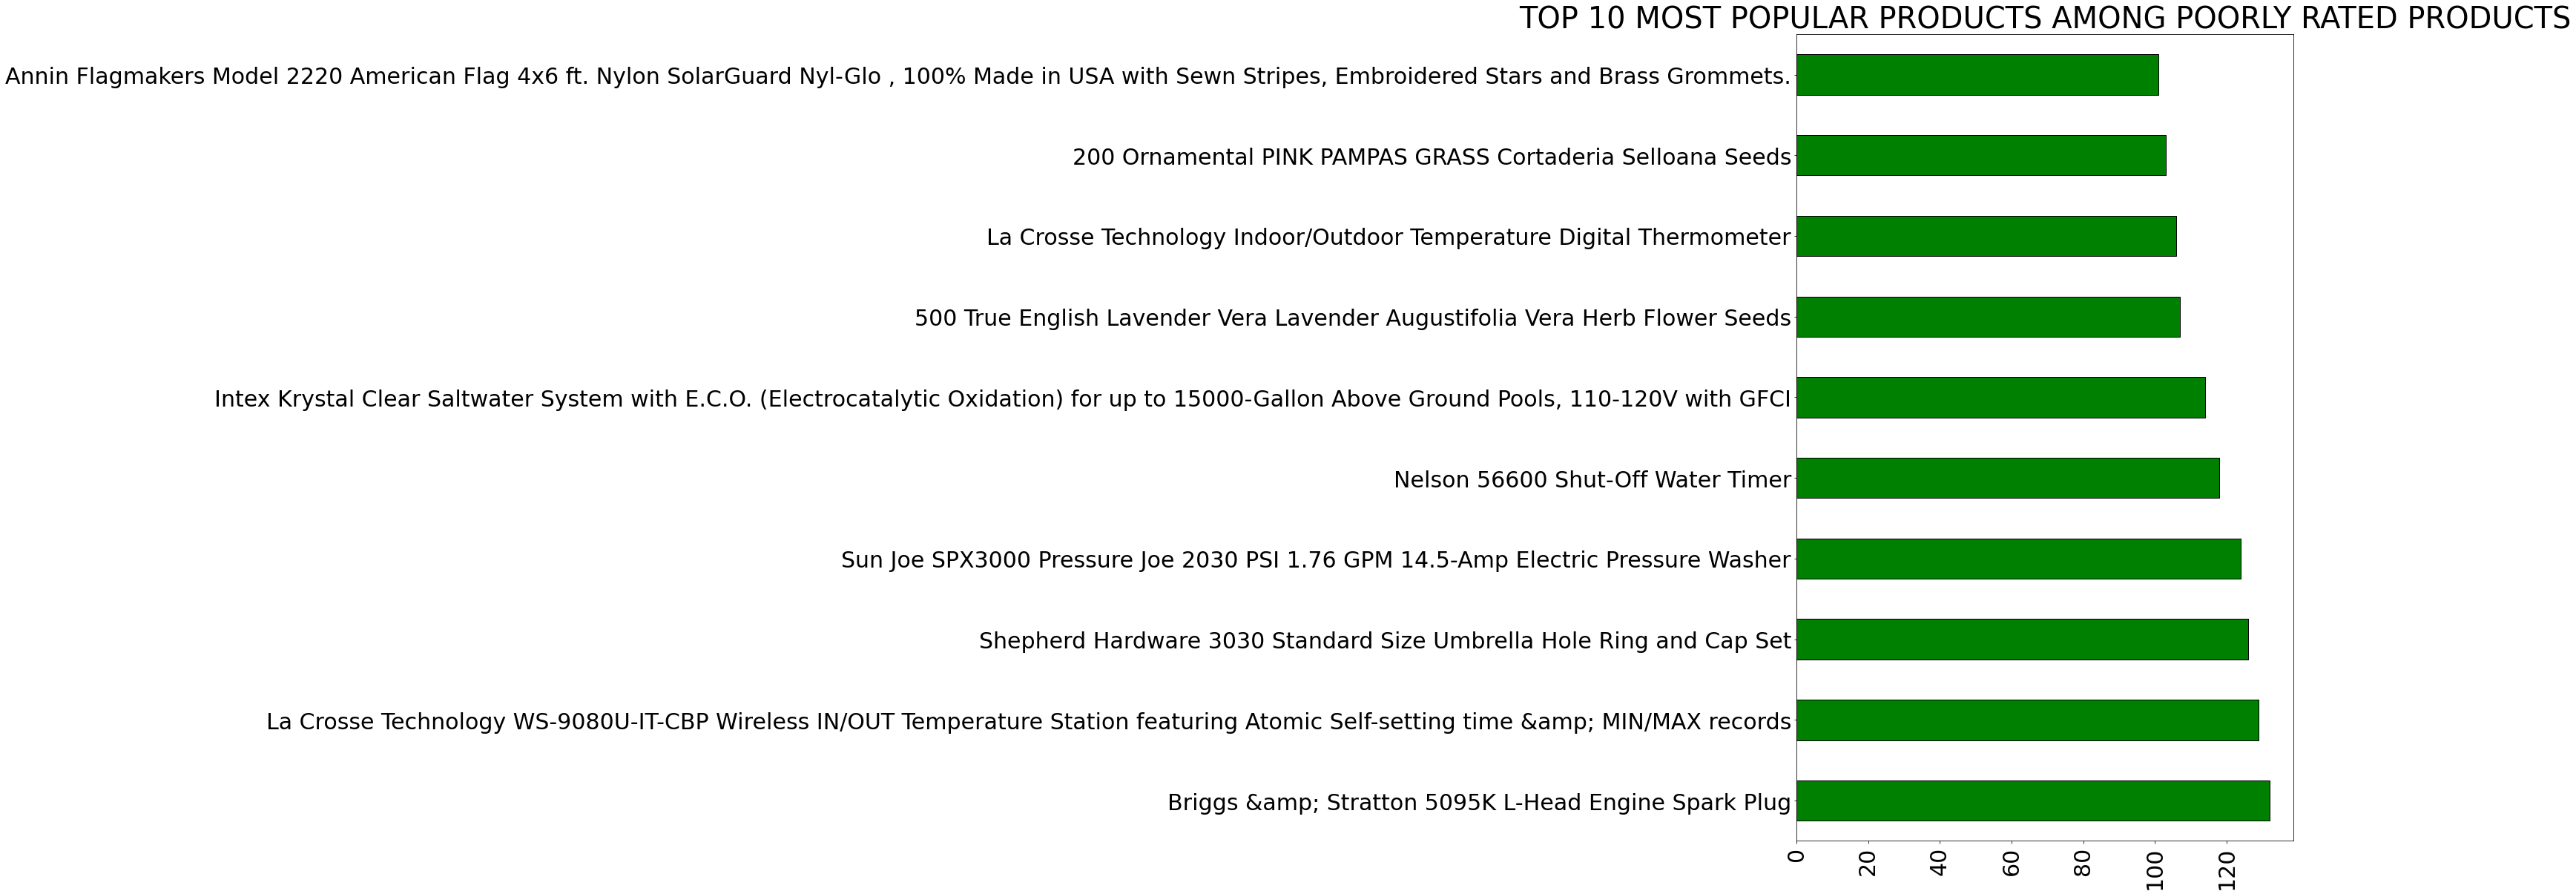

In [66]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG POORLY RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_poorly_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

<AxesSubplot:xlabel='verified', ylabel='count'>

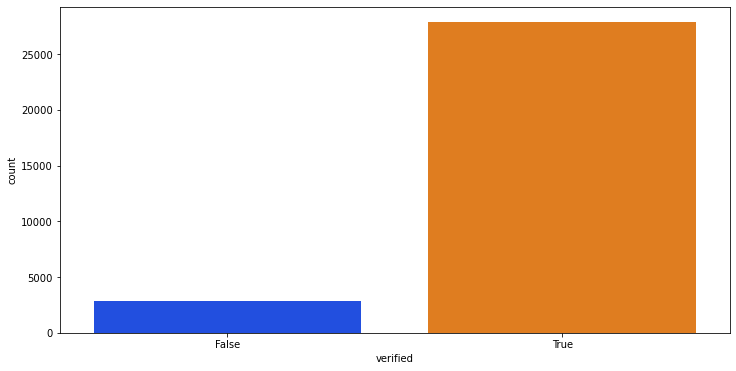

In [67]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_poorly_rated_cluster,x='verified')

# *********TOOLS AND HOMEIMPOROVEMENT************

In [68]:
df_tools=pd.read_csv('TOOLS_COMPLETELY_CLEAN_FULLY_MERGED_RDY_FOR_MDLLING')
df_tools

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE
0,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AL19QO4XLBQPU,5.0,True,"returned, decided against this product",2018-01-28
1,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1I7CVB7X3T81E,5.0,True,Awesome heater for the electrical requirements...,2017-11-30
2,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1AQXO4P5U674E,5.0,True,Keeps the mist of your wood trim and on you. B...,2017-09-12
3,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AIRV678P7C4NK,4.0,True,"So far I hooked it up and tested it , filled a...",2017-07-19
4,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A22I5QDNTNECDW,1.0,True,"i installed this 10 months ago, instructions w...",2017-05-25
...,...,...,...,...,...,...,...,...,...,...
2267340,BRASSCRAFT BC00400 Zip-it Drain Cleaning Tool,BrassCraft,Appliances,48.150000,B014LVI3M0,AU7O296O6PXZM,4.0,False,"The Zip-It Tool is a handy drain opener, espec...",2015-08-10
2267341,BRASSCRAFT BC00400 Zip-it Drain Cleaning Tool,BrassCraft,Appliances,48.150000,B014LVI3M0,A2XXH1VFIE2TFD,5.0,True,This thing is great! Bathroom sink was so clog...,2016-08-24
2267342,BRASSCRAFT BC00400 Zip-it Drain Cleaning Tool,BrassCraft,Appliances,48.150000,B014LVI3M0,A2BF84Q3VG33VQ,5.0,False,I purchased this exact product from a local bo...,2016-05-30
2267343,BRASSCRAFT BC00400 Zip-it Drain Cleaning Tool,BrassCraft,Appliances,48.150000,B014LVI3M0,A1E2ZJP9XA5M7J,4.0,True,I have had one of these in the past and was cu...,2016-04-13


In [69]:
df_tools.shape 

(2267345, 10)

In [70]:
df_tools.drop_duplicates(subset=None,keep='first',inplace=True)                 # drop duplicate rows instead of first                 # drop duplicate rows instead of first

In [71]:
df_tools.shape

(1817775, 10)

In [72]:
df_tools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1817775 entries, 0 to 2267344
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   title        object 
 1   brand        object 
 2   main_cat     object 
 3   price        float64
 4   product_id   object 
 5   Reviewer_id  object 
 6   rating       float64
 7   verified     bool   
 8   reviewText   object 
 9   DATE         object 
dtypes: bool(1), float64(2), object(7)
memory usage: 140.4+ MB


In [73]:
df_tools.describe()

,price,rating
count,1.817775e+06,1.817775e+06
mean,2.915003e+01,4.411672e+00
std,5.842025e+01,1.073255e+00
min,1.000000e-02,1.000000e+00
25%,8.470000e+00,4.000000e+00
50%,1.799000e+01,5.000000e+00
75%,4.590227e+01,5.000000e+00
max,3.041697e+04,5.000000e+00


In [74]:
df_tools.isnull().sum()

title          0
brand          0
main_cat       0
price          0
product_id     0
Reviewer_id    0
rating         0
verified       0
reviewText     0
DATE           0
dtype: int64

In [75]:
df_tools['rating']=df_tools['rating'].astype('int64')

# ******Using KMeans Algorithm

In [76]:
df_pivot=df_tools.pivot_table(index=['title'],values=['rating','price'],aggfunc='mean')
df_pivot

,price,rating
title,,
18&quot; Garage Door Torsion Spring Winding Bars,16.820000,4.812500
300W Low Voltage Landscape Light Transformer 12V,145.000000,4.900000
360 Siphon RV Fume Extractor - White,38.556766,4.458333
"3M 6200 Half Mask for Use With 6000 Series Cartridges, Face Piece",1.960000,4.756757
4 Way Diamond Knife Sharpener Hone Sharpening Stone New,23.980000,4.125000
...,...,...
"{New Version 6led} Solar Powered Outdoor Lights -Weatherproof - No Tools Required; Motion Sensor - Detector Activated for Garden, Patio, Stair, Deck, Street, Garage -(Power Saving--no Dim Light Mode)--no Battery Required",199.990000,4.800000
{Upgraded} Powerextra 3000mah Twin Pack Compatible with Lincoln Grease Guns 12V Ni-MH Backup Battery Replace 1201 LIN-1201 218-787,47.990000,4.833333
"{Upgraded}Powerextra 12V 3000mAh Replacement Power Tool Battery for MAKITA 5092D, 5092DW, 6011D, 6011DW",1.410000,4.615385


In [77]:
df_prod_avg=pd.DataFrame()
df_prod_avg['title']=list(df_pivot.index)
df_prod_avg['Avg_Price']=df_pivot[['price']].values
df_prod_avg['Average Rating']=df_pivot[['rating']].values

In [78]:
df_prod_avg

,title,Avg_Price,Average Rating
0,18&quot; Garage Door Torsion Spring Winding Bars,16.820000,4.812500
1,300W Low Voltage Landscape Light Transformer ...,145.000000,4.900000
2,360 Siphon RV Fume Extractor - White,38.556766,4.458333
3,3M 6200 Half Mask for Use With 6000 Series Ca...,1.960000,4.756757
4,4 Way Diamond Knife Sharpener Hone Sharpening...,23.980000,4.125000
...,...,...,...
67544,{New Version 6led} Solar Powered Outdoor Light...,199.990000,4.800000
67545,{Upgraded} Powerextra 3000mah Twin Pack Compat...,47.990000,4.833333
67546,{Upgraded}Powerextra 12V 3000mAh Replacement P...,1.410000,4.615385
67547,{Upgraded}Powerextra 2 Pack Lincoln 12V 3000mA...,48.990000,4.600000


In [79]:
tools_df_cluster=pd.merge(df_tools,df_prod_avg,on=('title'),how='inner')

In [80]:
tools_df_cluster.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE,Avg_Price,Average Rating
0,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AL19QO4XLBQPU,5,True,"returned, decided against this product",2018-01-28,45.902274,4.555556
1,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1I7CVB7X3T81E,5,True,Awesome heater for the electrical requirements...,2017-11-30,45.902274,4.555556
2,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1AQXO4P5U674E,5,True,Keeps the mist of your wood trim and on you. B...,2017-09-12,45.902274,4.555556
3,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AIRV678P7C4NK,4,True,"So far I hooked it up and tested it , filled a...",2017-07-19,45.902274,4.555556
4,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A22I5QDNTNECDW,1,True,"i installed this 10 months ago, instructions w...",2017-05-25,45.902274,4.555556


In [81]:
tools_df_cluster=tools_df_cluster[tools_df_cluster['Avg_Price']!=tools_df_cluster['Avg_Price'].max()]

### We shall consider the price column and the rating column for clustering

In [82]:
df_tools_cluster=tools_df_cluster[['Avg_Price','Average Rating']]

In [83]:
df_tools_cluster.head()

,Avg_Price,Average Rating
0,45.902274,4.555556
1,45.902274,4.555556
2,45.902274,4.555556
3,45.902274,4.555556
4,45.902274,4.555556


## Performing Min-Max Scaling

In [84]:
scaler=MinMaxScaler()

In [85]:
df_tools_cluster_scaled=pd.DataFrame(scaler.fit_transform(df_tools_cluster.to_numpy()),columns=df_tools_cluster.columns)

In [86]:
df_tools_cluster_scaled.head()

,Avg_Price,Average Rating
0,0.00883,0.888889
1,0.00883,0.888889
2,0.00883,0.888889
3,0.00883,0.888889
4,0.00883,0.888889


### Findng the optimal number of clusters

## 1) Elbow method

In [87]:
X=df_tools_cluster_scaled.copy()

In [88]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k,random_state=10)
    km.fit(X)
    sse.append(km.inertia_)                          # sum of squared error

In [89]:
sse

[15512.096642327044,
 6114.548168143535,
 3340.5783575600503,
 2153.7009257360824,
 1501.2200632775675,
 1119.6366464832397,
 883.3763919541618,
 717.0240973931063,
 594.2421187838554]

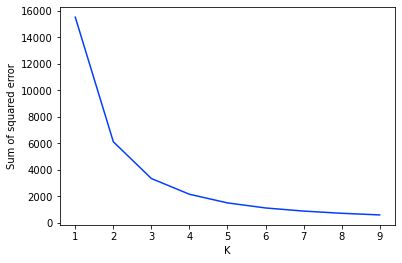

In [90]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### We see from the elbow curve method that the ideal number of clusters is 3

## *** Predicting KMeans cluster distribution

In [91]:
km = KMeans(n_clusters=4,random_state=10)
yp = km.fit_predict(X)
yp

array([2, 2, 2, ..., 0, 0, 0])

In [92]:
df_tools_cluster_scaled['cluster'] = yp
df_tools_cluster_scaled.head()

,Avg_Price,Average Rating,cluster
0,0.00883,0.888889,2
1,0.00883,0.888889,2
2,0.00883,0.888889,2
3,0.00883,0.888889,2
4,0.00883,0.888889,2


In [93]:
df_tools_cluster_scaled['cluster'].unique()

array([2, 0, 1, 3])

#### Finding Cluster Centroids

In [94]:
cluster_centroid = km.cluster_centers_
cluster_centroid

array([[0.0059066 , 0.92962822],
       [0.00557319, 0.74969505],
       [0.00526083, 0.85166302],
       [0.00590501, 0.57393741]])

#### Segregating the Clusters

In [95]:
df1_cluster = df_tools_cluster_scaled[df_tools_cluster_scaled.cluster==0]
df2_cluster = df_tools_cluster_scaled[df_tools_cluster_scaled.cluster==1]
df3_cluster = df_tools_cluster_scaled[df_tools_cluster_scaled.cluster==2]
df4_cluster = df_tools_cluster_scaled[df_tools_cluster_scaled.cluster==3]

In [96]:
df_tools_cluster_scaled.shape

(1817772, 3)

### Observing the Clusters

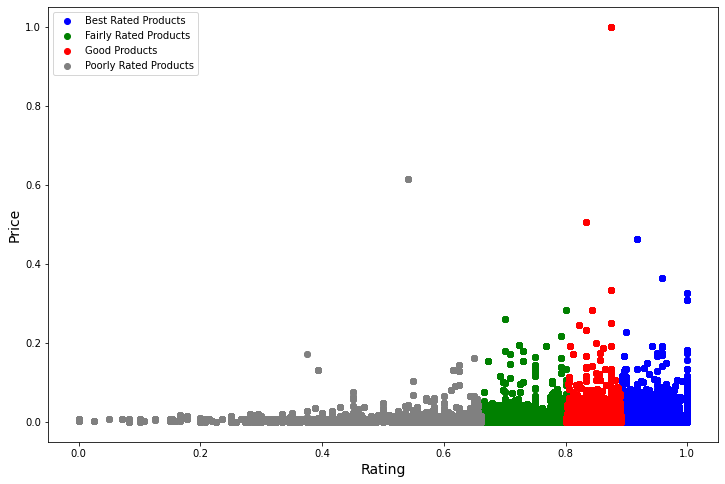

In [97]:
plt.figure(figsize=(12,8))
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.scatter(df1_cluster['Average Rating'],df1_cluster['Avg_Price'],color='blue')
plt.scatter(df2_cluster['Average Rating'],df2_cluster['Avg_Price'],color='green')
plt.scatter(df3_cluster['Average Rating'],df3_cluster['Avg_Price'],color='red')
plt.scatter(df4_cluster['Average Rating'],df4_cluster['Avg_Price'],color='grey')
plt.legend(['Best Rated Products','Fairly Rated Products','Good Products','Poorly Rated Products'])
plt.show()

In [98]:
df1_cluster.head()

,Avg_Price,Average Rating,cluster
45,0.025964,0.9,0
46,0.025964,0.9,0
47,0.025964,0.9,0
48,0.025964,0.9,0
49,0.025964,0.9,0


In [99]:
df_tools_copy=tools_df_cluster.copy()

In [100]:
df_tools_copy['Kmeans Clusters']=yp

## ******Viewing Pairplot

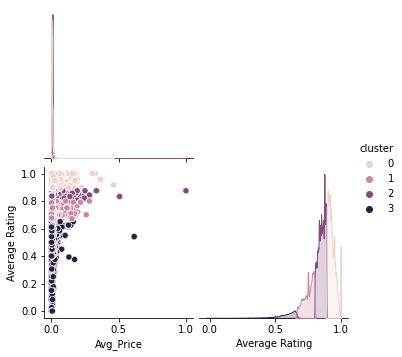

In [101]:
sb.set_palette("bright")
sb.pairplot(df_tools_cluster_scaled, kind="scatter", hue ="cluster", corner=True)
plt.show()

### We see that KMeans Clustering gives us the best clustering so now we must perform EDA to observe trends in the clusters

In [102]:
df_tools=df_tools[df_tools['price']!=df_tools['price'].max()]

In [103]:
df_tools['Cluster']=yp

In [104]:
df_tools.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE,Cluster
0,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AL19QO4XLBQPU,5,True,"returned, decided against this product",2018-01-28,2
1,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1I7CVB7X3T81E,5,True,Awesome heater for the electrical requirements...,2017-11-30,2
2,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A1AQXO4P5U674E,5,True,Keeps the mist of your wood trim and on you. B...,2017-09-12,2
3,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,AIRV678P7C4NK,4,True,"So far I hooked it up and tested it , filled a...",2017-07-19,2
4,Breeding Organic Vegetables: A Step-by-Step Gu...,SioGreen,Tools & Home Improvement,45.902274,0982085028,A22I5QDNTNECDW,1,True,"i installed this 10 months ago, instructions w...",2017-05-25,2


In [105]:
df_best_rated_cluster = df_tools[df_tools['Cluster']==0]
df_fairly_rated_cluster = df_tools[df_tools['Cluster']==1]
df_well_rated_cluster = df_tools[df_tools['Cluster']==2]
df_poorly_rated_cluster = df_tools[df_tools['Cluster']==3]

In [106]:
df_cluster_compare=pd.DataFrame()
df_cluster_compare['Product Clusters']=['Best Rated Products','Fairly Rated Products','Well Rated Products','Poorly Rated Products']
df_cluster_compare['Average Price']=[df_best_rated_cluster['price'].mean(),df_fairly_rated_cluster['price'].mean(),df_well_rated_cluster['price'].mean(),df_poorly_rated_cluster['price'].mean()]

In [107]:
df_cluster_compare

,Product Clusters,Average Price
0,Best Rated Products,29.546529
1,Fairly Rated Products,29.096293
2,Well Rated Products,28.530543
3,Poorly Rated Products,30.198649


## Performing EDA to identify trends among best rated products

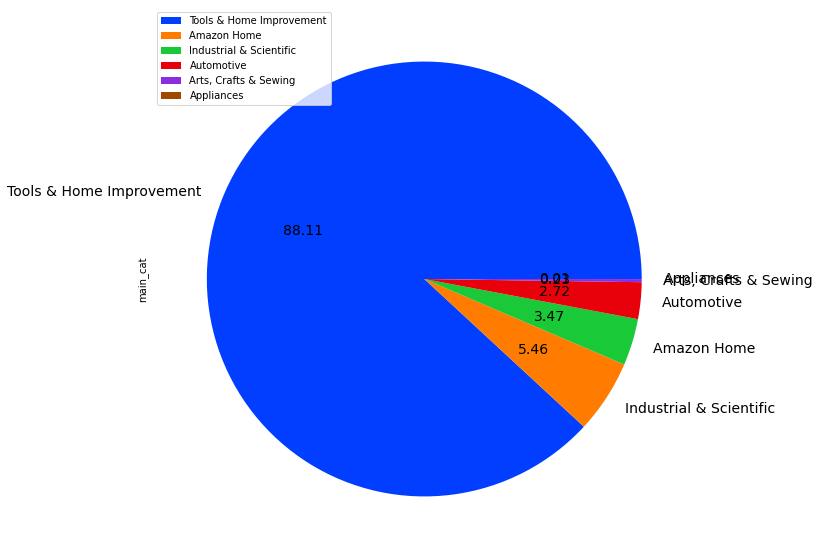

In [108]:
plt.figure(figsize=(16,10))
df_best_rated_cluster['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_best_rated_cluster['main_cat'].unique(),loc='upper left');

### Since we see that Tools and Home Improvement, Amazon Home, Industrial & Scientific and Automotive comprise more than 99.5%, we observe only those categories

In [109]:
cat=['Tools & Home Improvement','Amazon Home','Industrial & Scientific','Automotive']

In [110]:
df_tools_th_ah_is_a_best=df_best_rated_cluster[df_best_rated_cluster['main_cat'].isin(cat)]

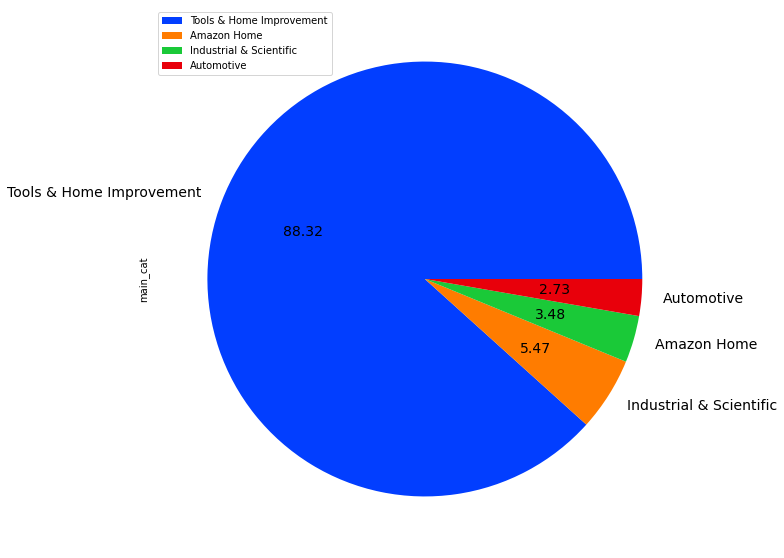

In [111]:
plt.figure(figsize=(16,10))
df_tools_th_ah_is_a_best['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_tools_th_ah_is_a_best['main_cat'].unique(),loc='upper left');

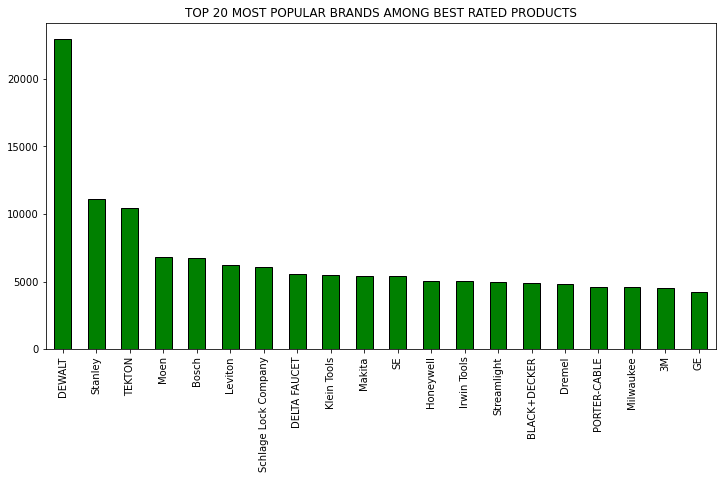

In [112]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG BEST RATED PRODUCTS")
df_best_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

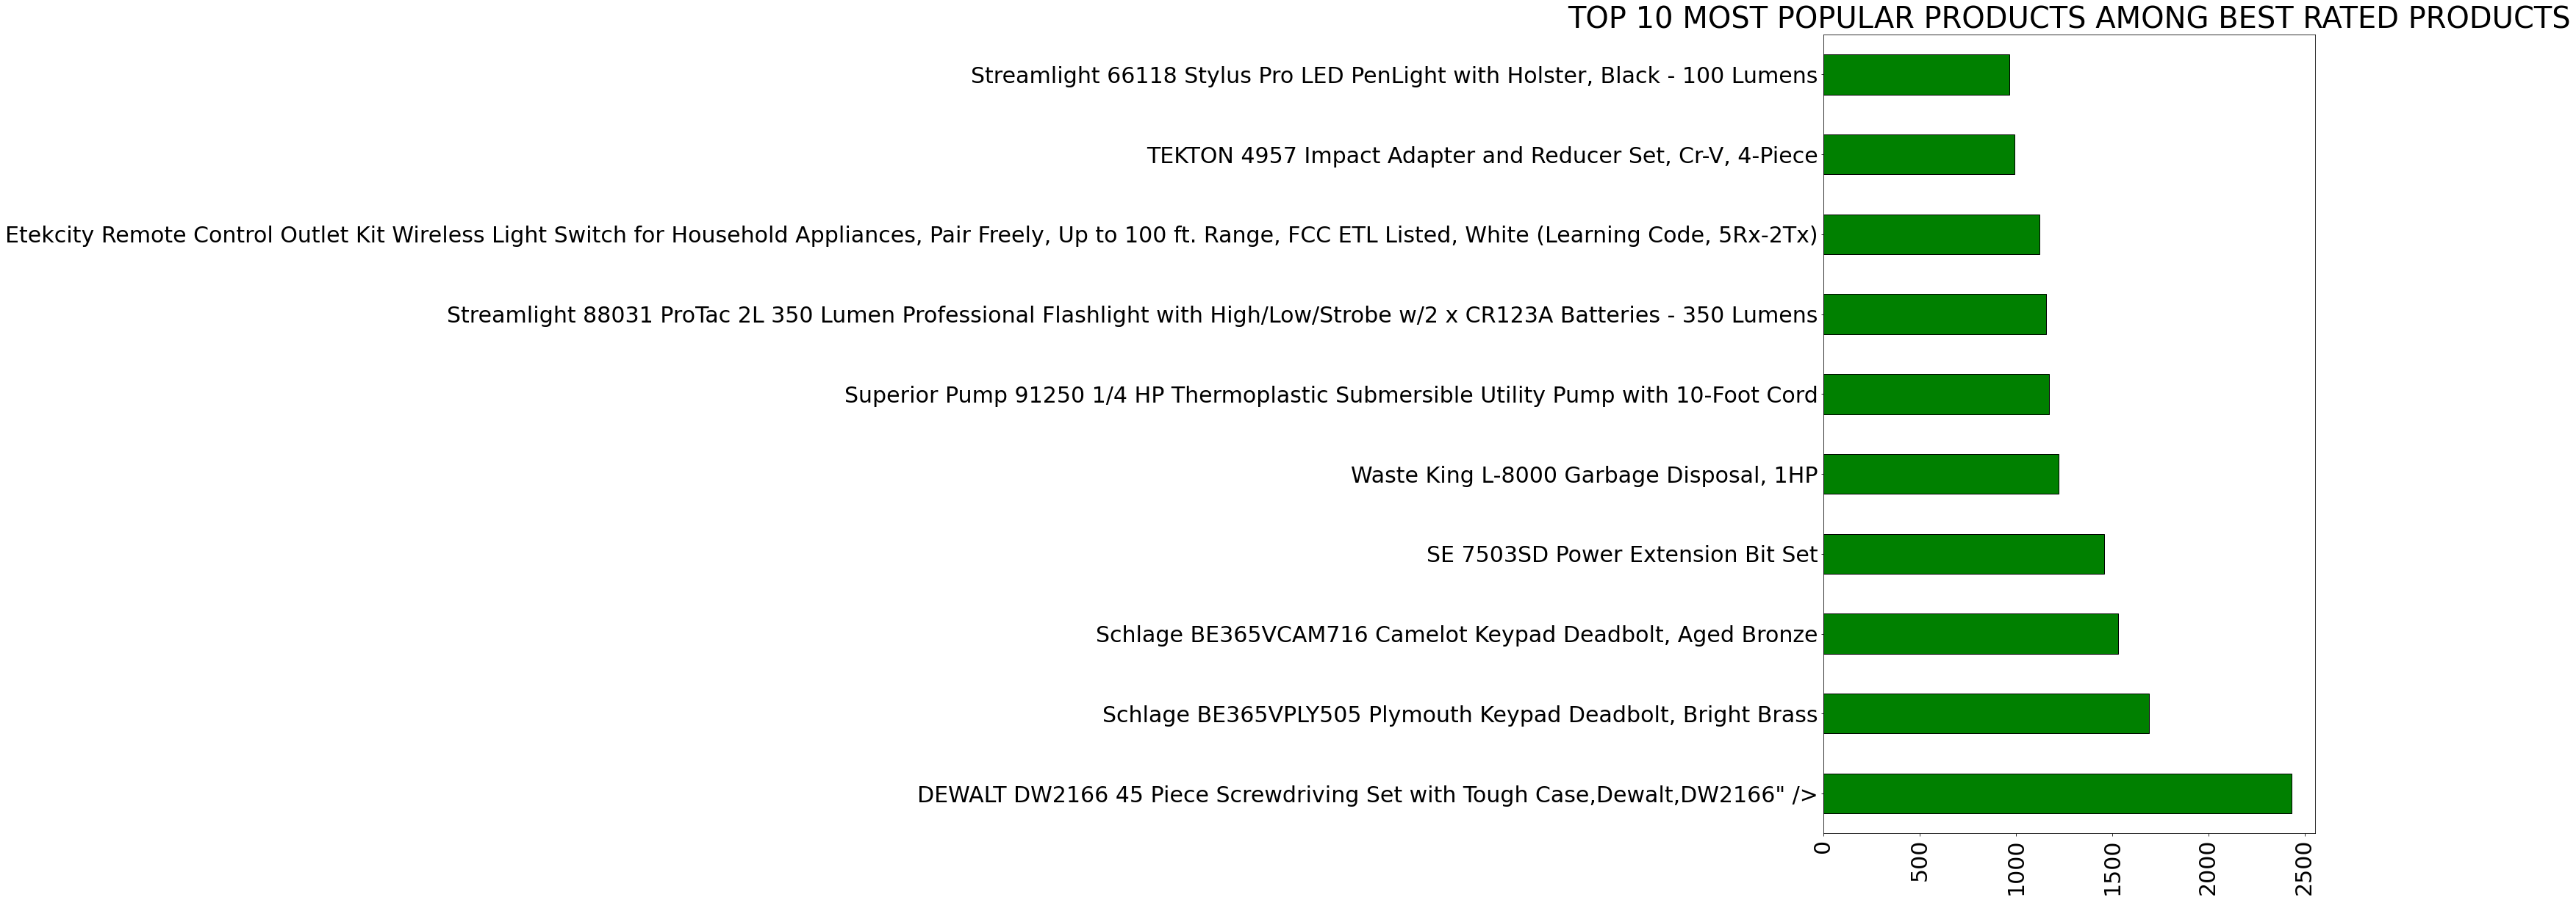

In [113]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG BEST RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_best_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

In [114]:
df_best_rated_cluster.head()

,title,brand,main_cat,price,product_id,Reviewer_id,rating,verified,reviewText,DATE,Cluster
45,PANTONE GP1501 Plus Series Formula Guide Coate...,Pantone,Tools & Home Improvement,134.95,1590653289,A36E8SQJ666JS2,5,True,Best,2015-10-20,0
46,PANTONE GP1501 Plus Series Formula Guide Coate...,Pantone,Tools & Home Improvement,134.95,1590653289,A3QDMDSANPYGUX,5,True,a great product it does its job I am very happ...,2015-03-16,0
47,PANTONE GP1501 Plus Series Formula Guide Coate...,Pantone,Tools & Home Improvement,134.95,1590653289,A3L4U5U88JX06V,5,True,A must-have for any graphic designer who uses ...,2014-12-27,0
48,PANTONE GP1501 Plus Series Formula Guide Coate...,Pantone,Tools & Home Improvement,134.95,1590653289,A3EPBQPCEWVHIB,5,True,A must have for graphic designers.\nJust a not...,2014-12-17,0
49,PANTONE GP1501 Plus Series Formula Guide Coate...,Pantone,Tools & Home Improvement,134.95,1590653289,A34Z3SRMIT1MT7,3,True,They're ok just ok I do love the fact that I c...,2017-03-14,0


<AxesSubplot:xlabel='verified', ylabel='count'>

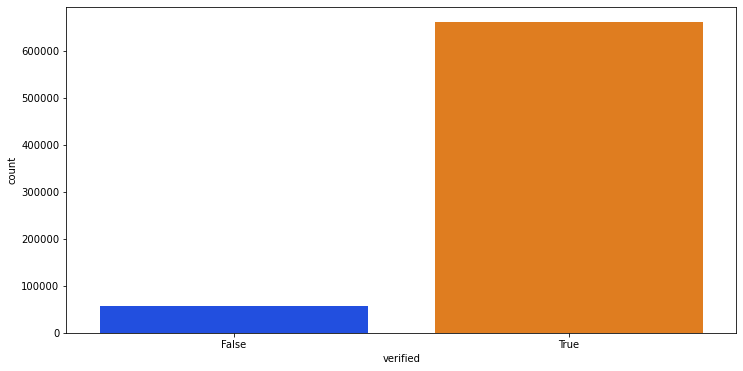

In [115]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_best_rated_cluster,x='verified')

### Performing EDA to identify characteristics among well rated products

In [116]:
df_tools_th_ah_is_a_well=df_well_rated_cluster[df_well_rated_cluster['main_cat'].isin(cat)]

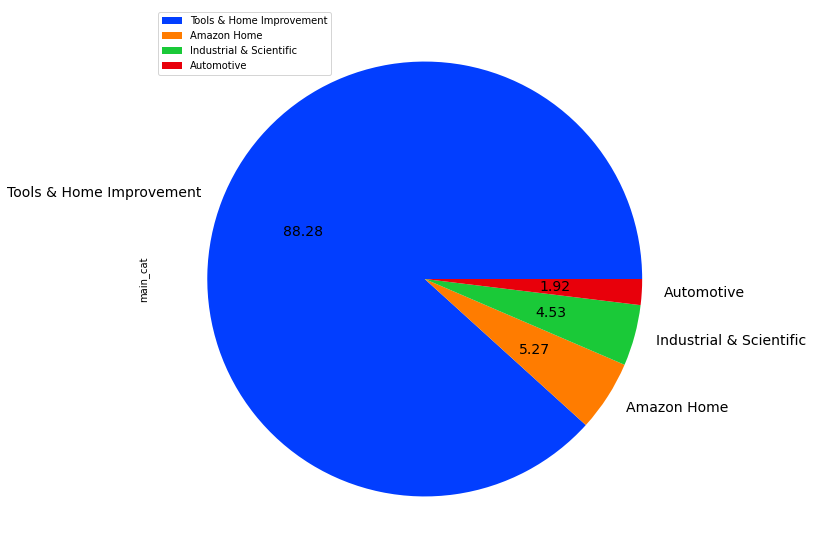

In [117]:
plt.figure(figsize=(16,10))
df_tools_th_ah_is_a_well['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_tools_th_ah_is_a_well['main_cat'].unique(),loc='upper left');

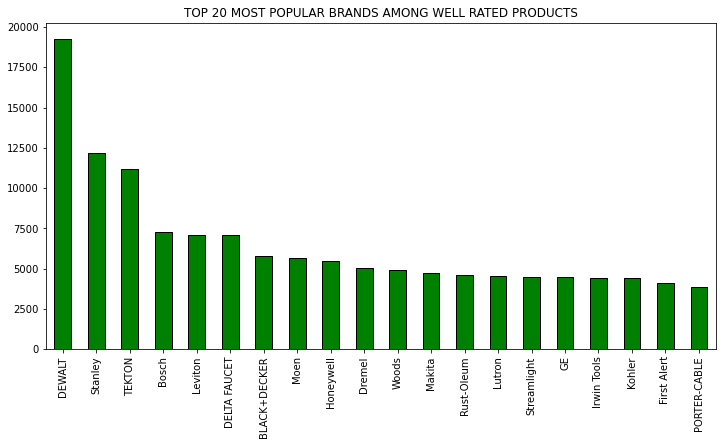

In [118]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG WELL RATED PRODUCTS")
df_well_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

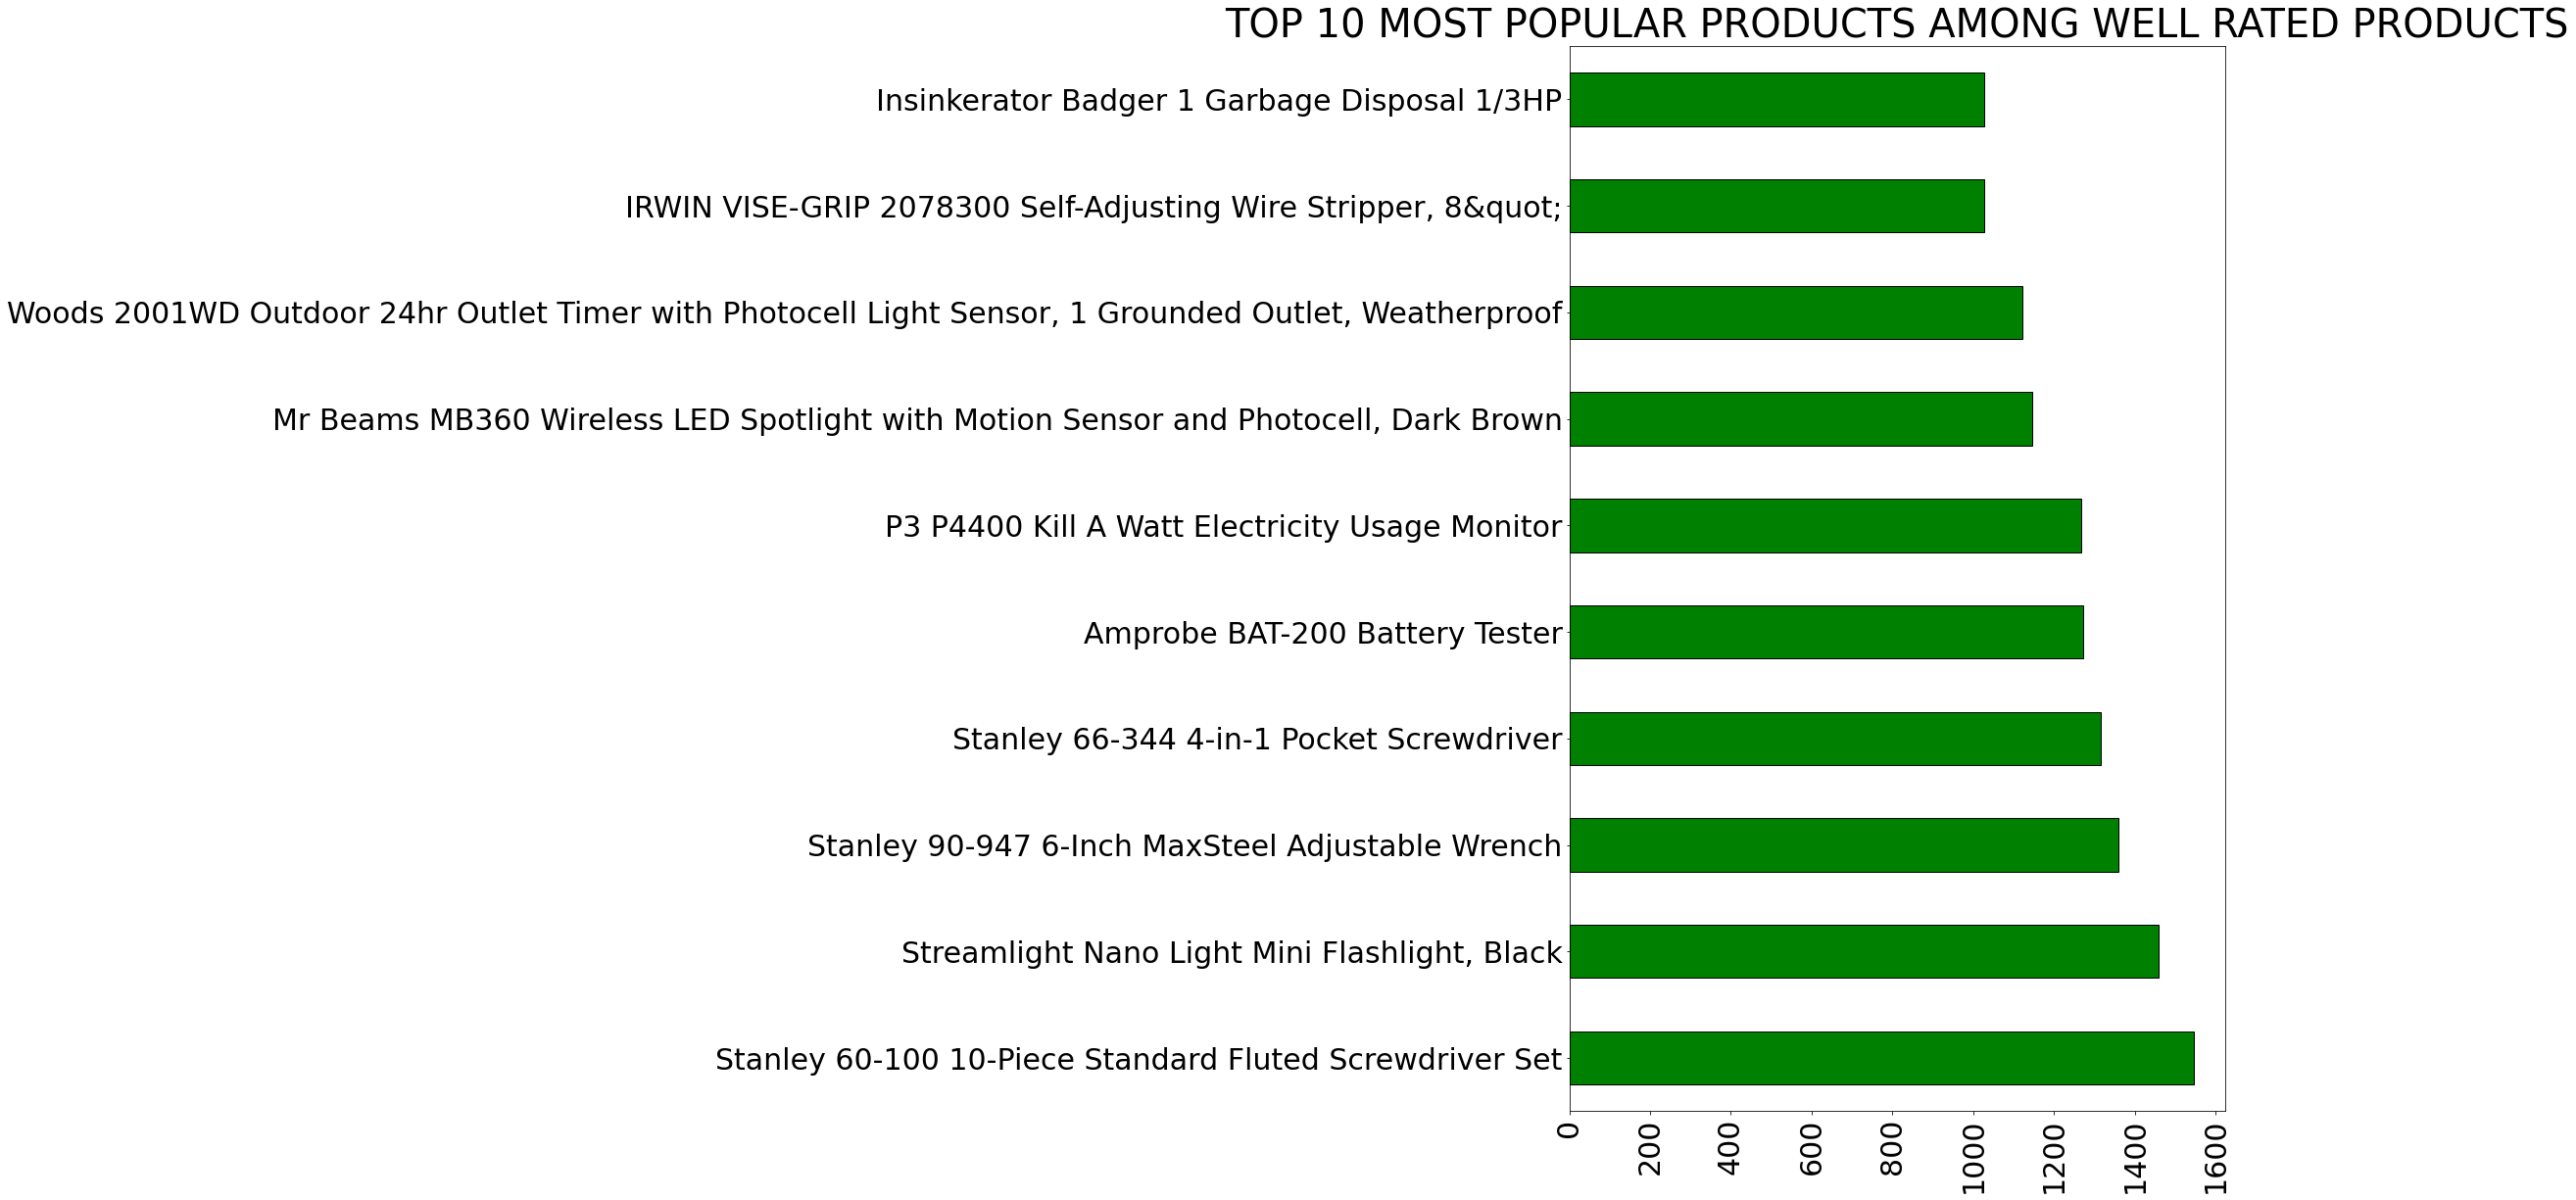

In [119]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG WELL RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_well_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

<AxesSubplot:xlabel='verified', ylabel='count'>

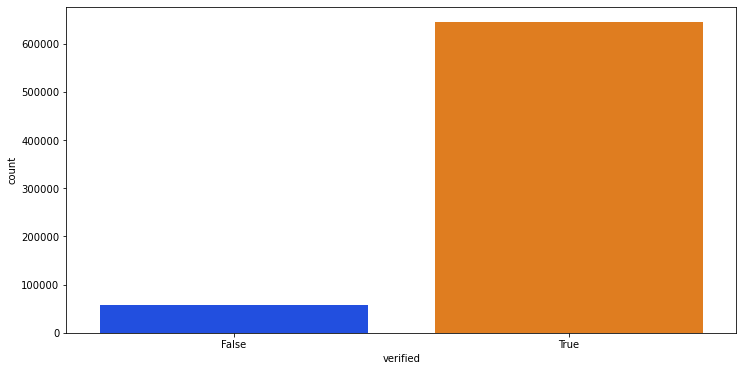

In [120]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_well_rated_cluster,x='verified')

## Performing EDA to identify trends among fairly rated products

In [121]:
df_tools_th_ah_is_a_fairly=df_fairly_rated_cluster[df_fairly_rated_cluster['main_cat'].isin(cat)]

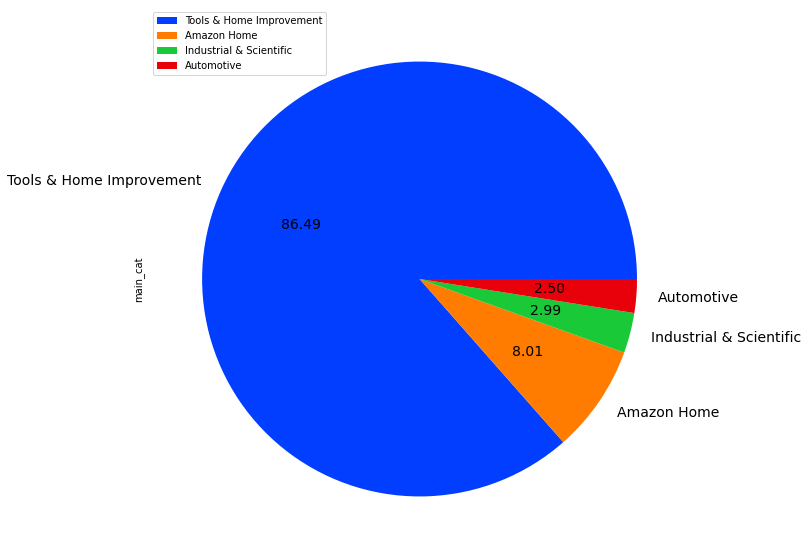

In [122]:
plt.figure(figsize=(16,10))
df_tools_th_ah_is_a_fairly['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_tools_th_ah_is_a_fairly['main_cat'].unique(),loc='upper left')

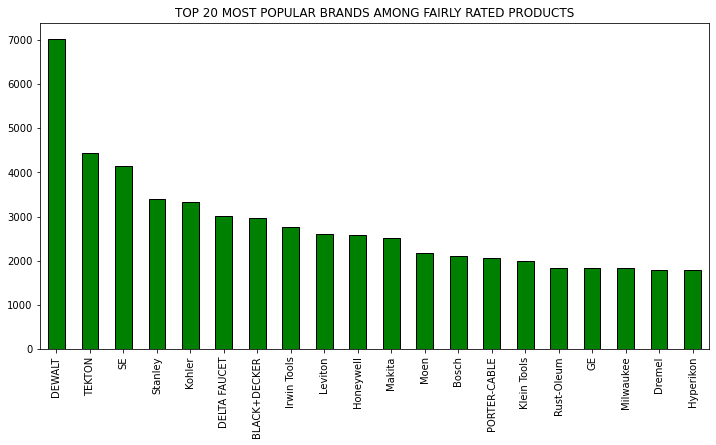

In [123]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG FAIRLY RATED PRODUCTS")
df_fairly_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

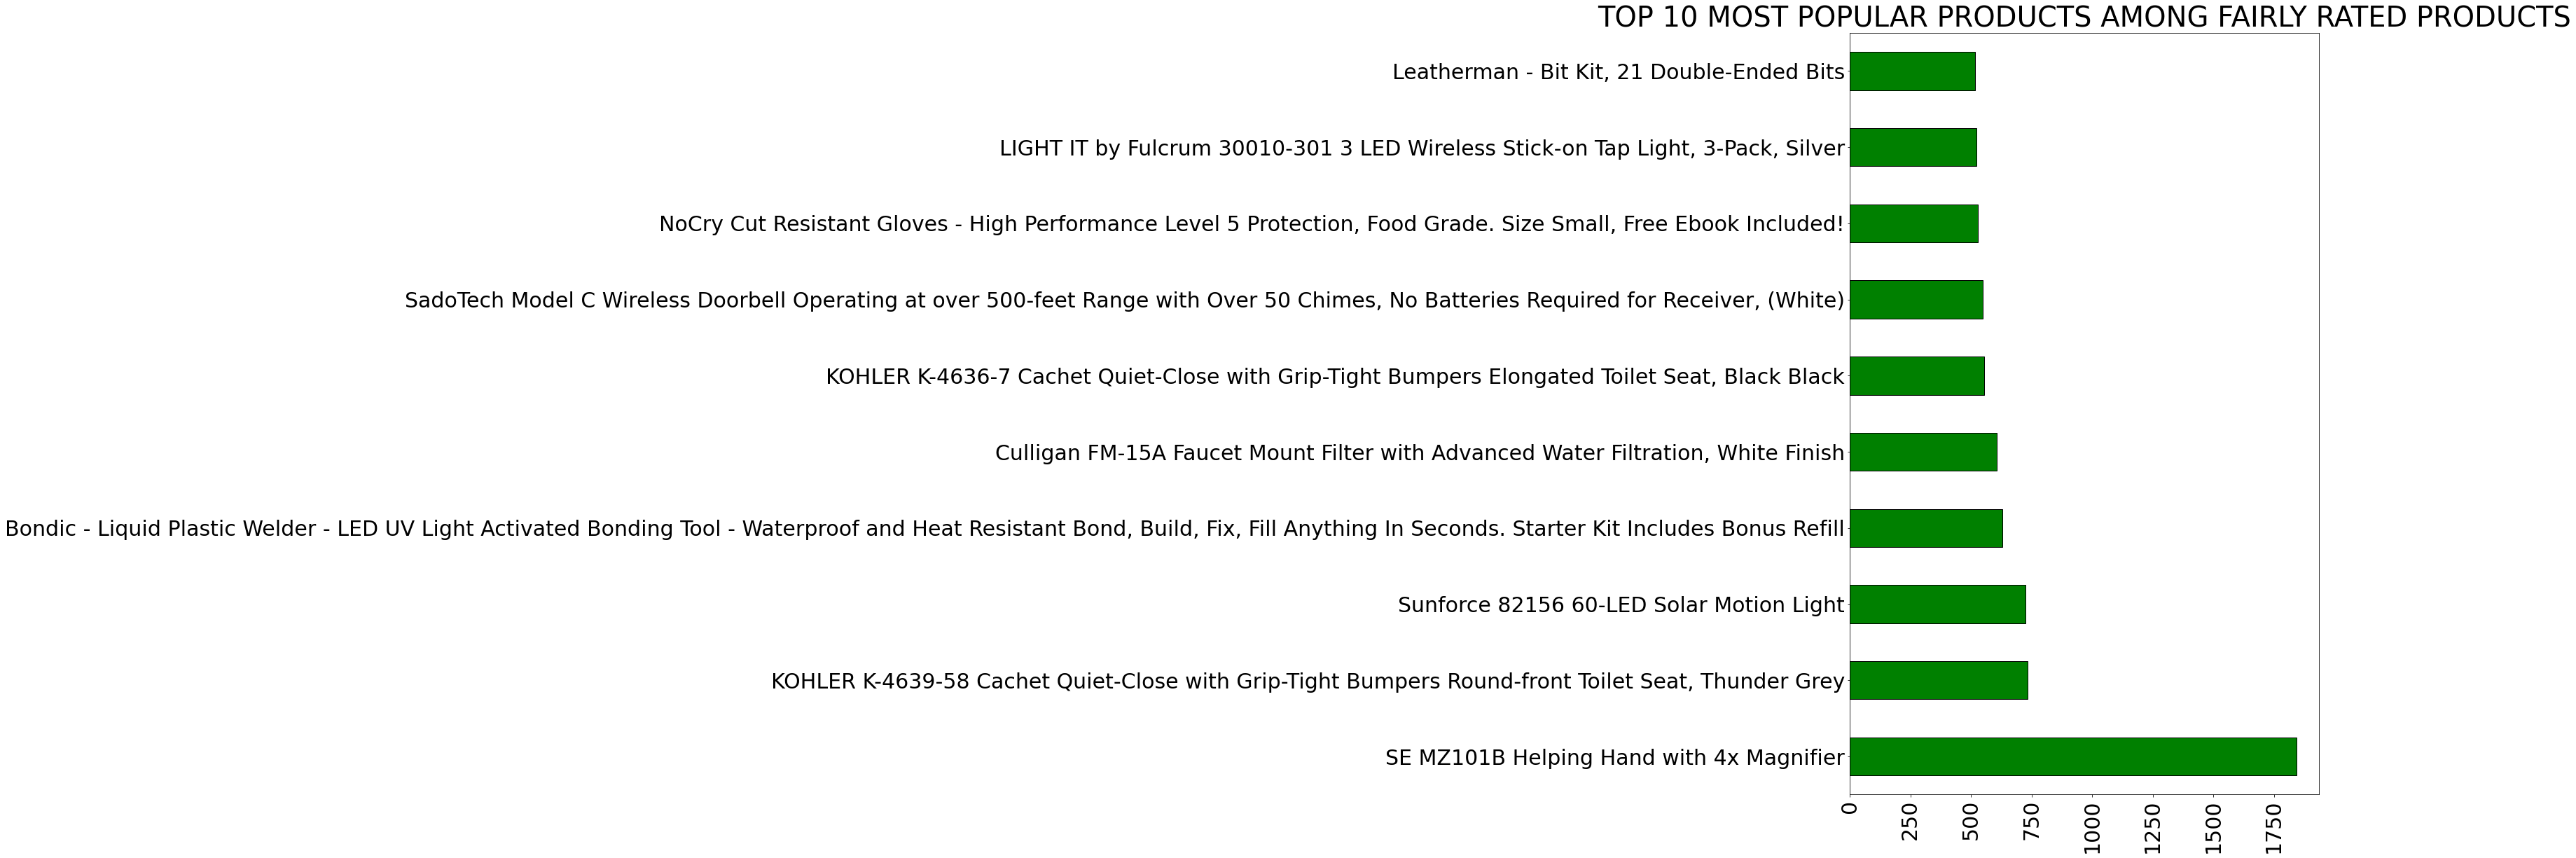

In [124]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG FAIRLY RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_fairly_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

<AxesSubplot:xlabel='verified', ylabel='count'>

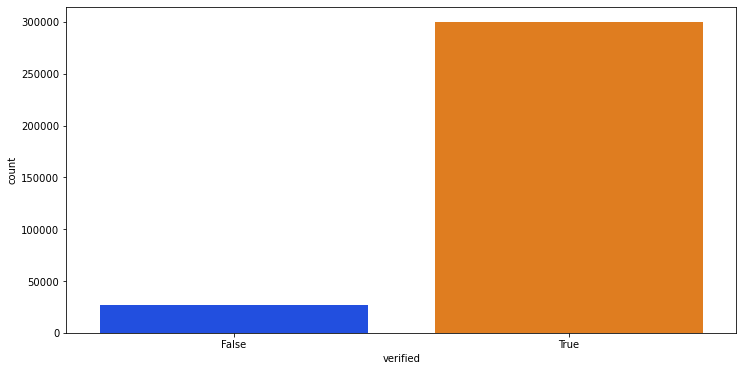

In [125]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_fairly_rated_cluster,x='verified')

## Performing EDA to identify trends among poorly rated products¶

In [126]:
df_tools_th_ah_is_a_poorly=df_poorly_rated_cluster[df_poorly_rated_cluster['main_cat'].isin(cat)]

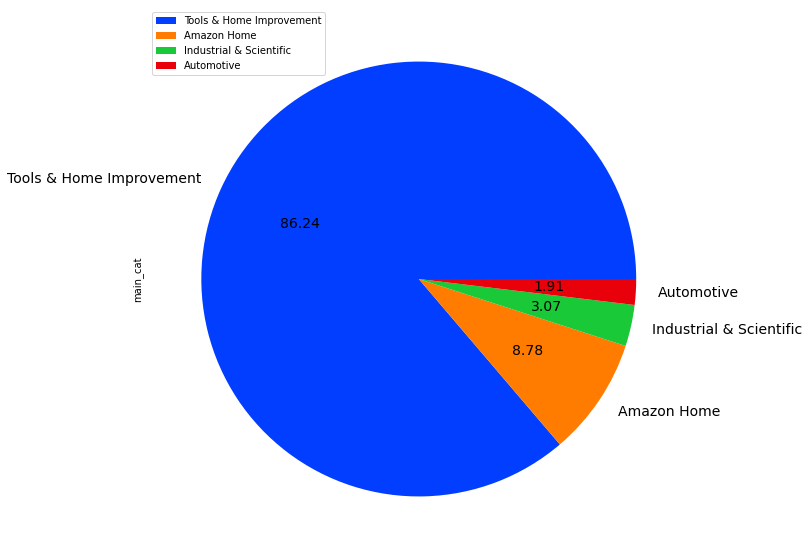

In [127]:
plt.figure(figsize=(16,10))
df_tools_th_ah_is_a_poorly['main_cat'].value_counts().plot(kind='pie',autopct='%.2f',textprops={'fontsize':14});
plt.legend(df_tools_th_ah_is_a_poorly['main_cat'].unique(),loc='upper left');

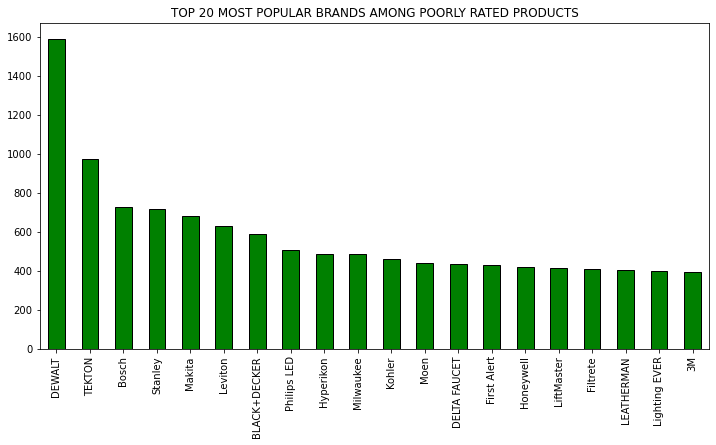

In [128]:
plt.figure(figsize=(12,6))
plt.title("TOP 20 MOST POPULAR BRANDS AMONG POORLY RATED PRODUCTS")
df_poorly_rated_cluster['brand'].value_counts()[:20].plot(kind = 'bar',ec = "black",color = "green");

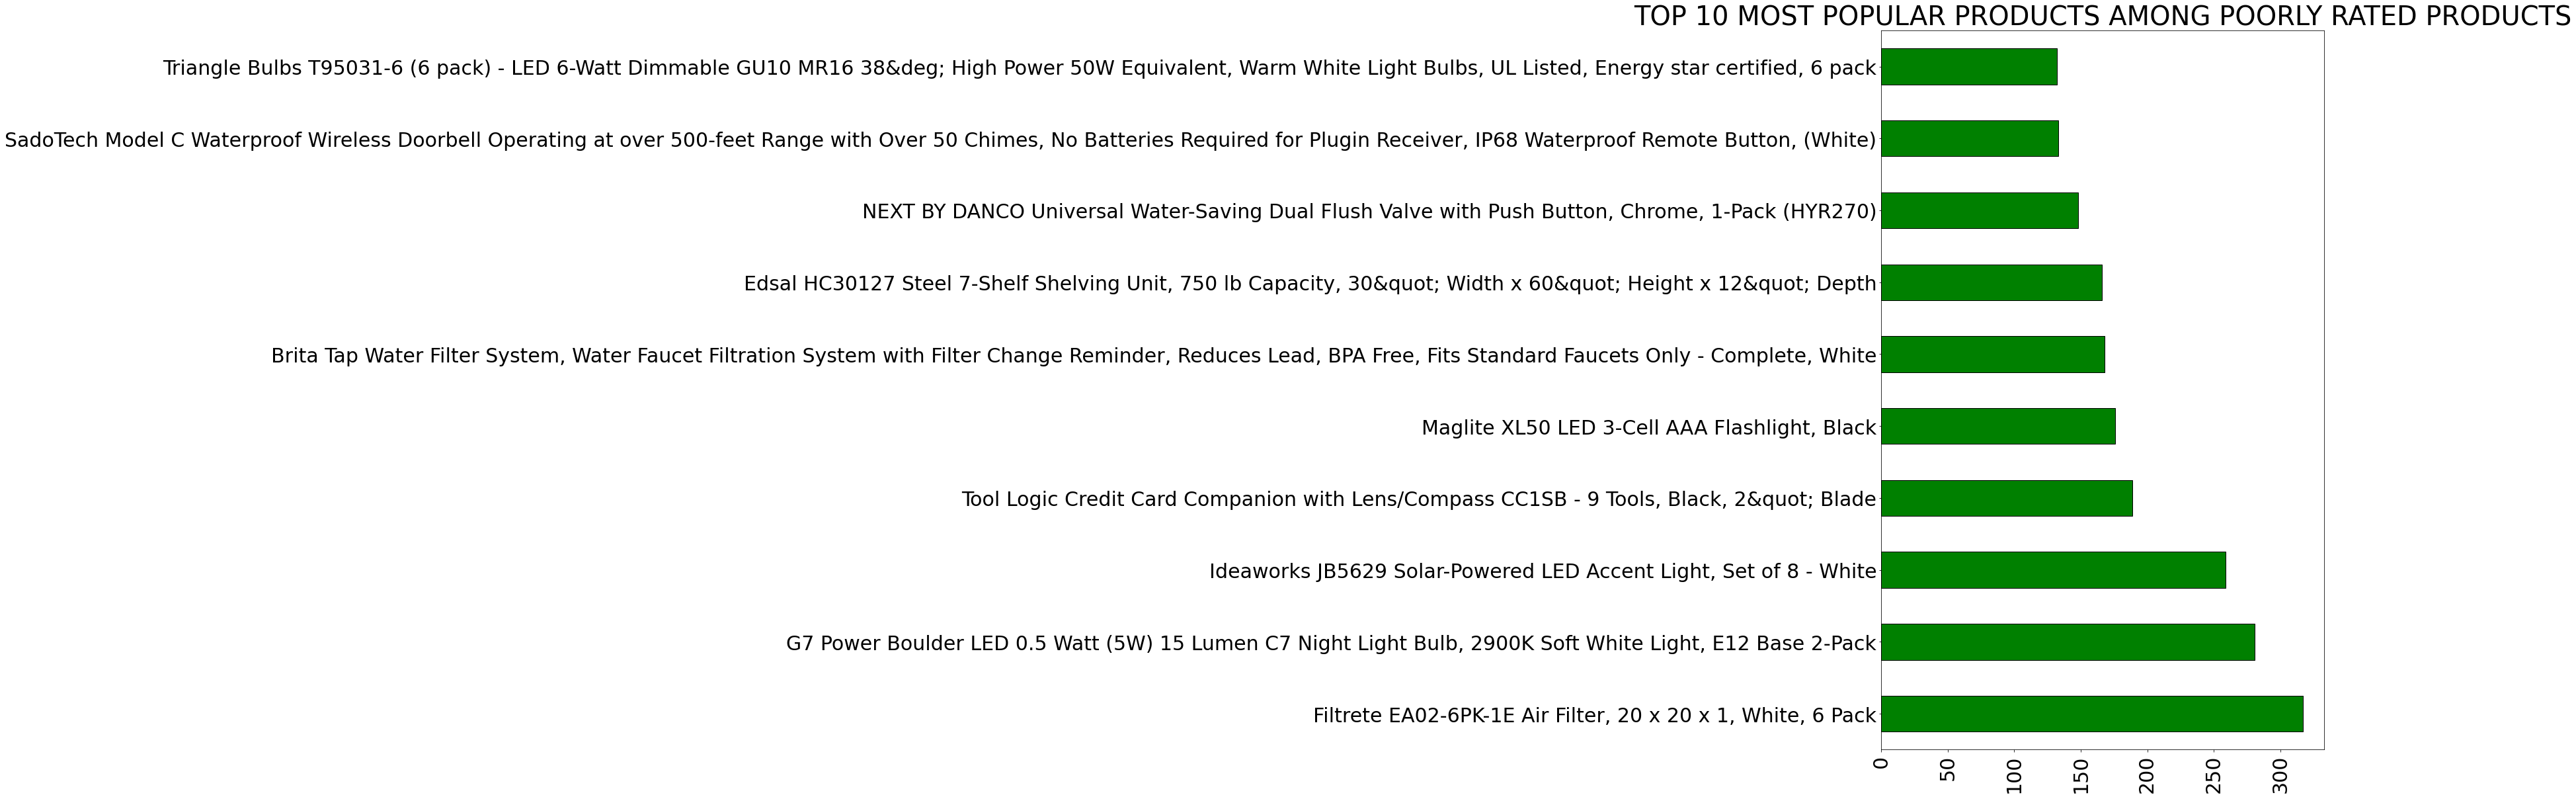

In [129]:
plt.figure(figsize=(12,20))
plt.title("TOP 10 MOST POPULAR PRODUCTS AMONG POORLY RATED PRODUCTS",fontsize=40)
plt.xticks(rotation = 90,fontsize=30);
plt.yticks(fontsize=30)
df_poorly_rated_cluster['title'].value_counts()[:10].plot(kind = 'barh',ec = "black",color = "green");

<AxesSubplot:xlabel='verified', ylabel='count'>

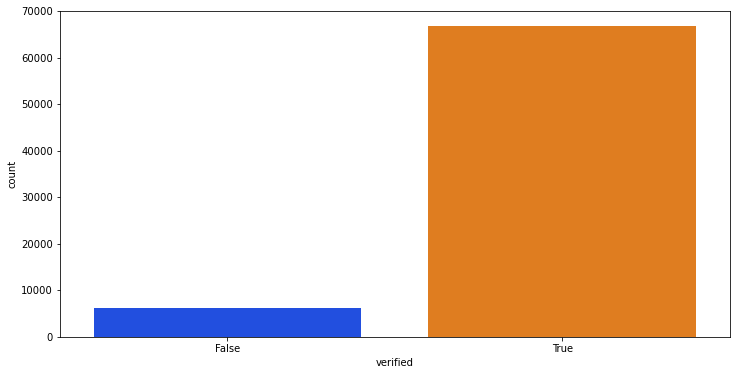

In [130]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_poorly_rated_cluster,x='verified')